<a href="https://colab.research.google.com/github/ShivaniThakur-19/Bike-Sharing-Demand-Prediction-Capstone-I/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# 1.Understanding the data:
- Import the Libraries
- Import the data and views it columns
- Check all the statistics and data types of the data
- Visualize the numerical and categorical data

In [4]:
#import the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
%matplotlib inline
# import warning 
import warnings
warnings.filterwarnings('ignore')
# import evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#import datetime library t wrok with datetime values
from datetime import datetime
import datetime as dt

# import  gridsearchcv , and randomsearCV for hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
#import other important libraries 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# import ML models 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor #linear , ridge , lasso and SGD regressor
from sklearn.preprocessing import PolynomialFeatures # for polynomial regression
from sklearn.tree import DecisionTreeRegressor # for decision tree regressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor # ensemble models
from xgboost import XGBRegressor #for XG boost
#
from sklearn.datasets import make_regression

In [5]:
# Mount your drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# load the dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv', encoding = ('ISO-8859-1'))

In [7]:
#make copy of our datasets 
df=data.copy()

In [8]:
# column name of our dataframe
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
#  replace columns name with the single column names

df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [10]:
# look at our new column name 
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [11]:
# dataframe 
df

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
# shape of dataset  
df.shape

(8760, 14)

In [13]:
# some basic info  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [14]:
# to know about descriptive summary 
df.describe(include="all")

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [16]:
# checking the null value in each column of datasets
df.isna().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [17]:
# check no. of unique values in each columns 
df.nunique()

Date                      365
Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

In [18]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### Correlation between columns

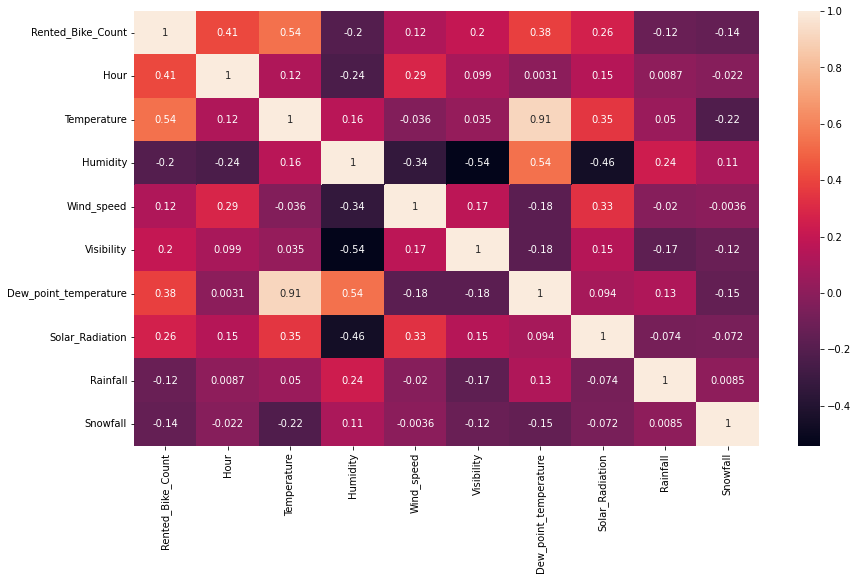

In [19]:
# ploting heat map to determine corelation b/w columns of your datasets
plt.figure(figsize = (14,8))
sns.heatmap(df.corr() , annot = True )

# **Initial visualisation**

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

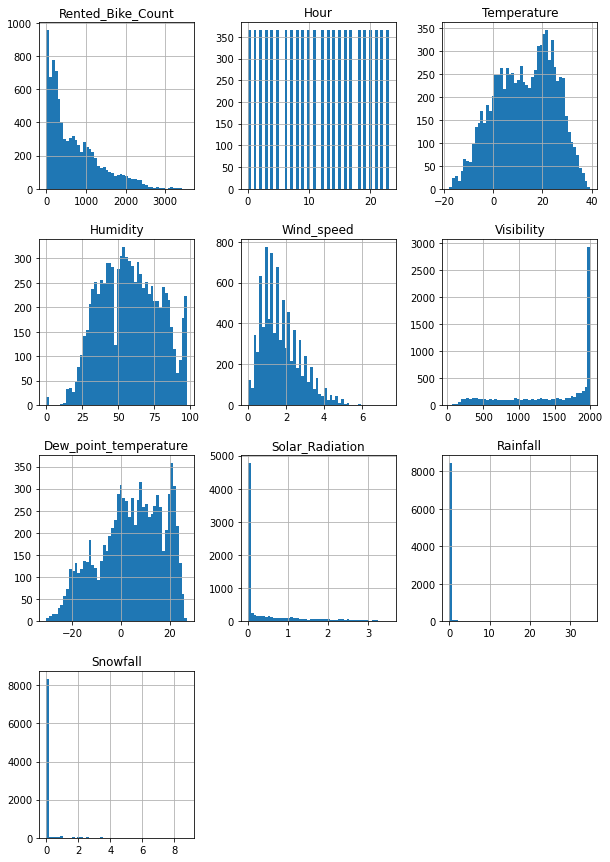

In [20]:
# Plot the data
df.hist(bins=50,figsize=(10,15))
plt.show()

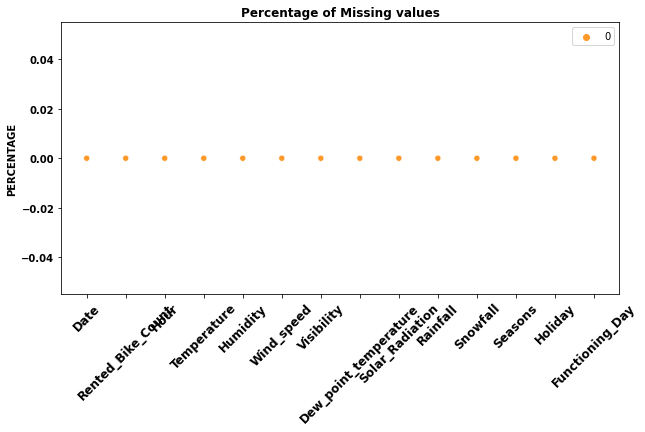

In [21]:
# plot the scatterplot to show missing values 
missing_values = pd.DataFrame((df.isna().sum()) * 100 / df.shape[0]).reset_index( )
plt.figure(figsize = (10,5))
ax = sns.scatterplot(df.columns,0,hue=0, palette="YlOrBr")  
plt.xticks(rotation =45,fontsize =12,Weight='bold')
plt.yticks(fontsize =10,Weight='bold')
plt.title("Percentage of Missing values",Weight='bold')
plt.ylabel("PERCENTAGE",Weight='bold')
plt.show()

As we can see above there are no missing value presents thankfully

In [22]:
# to know about duplicate data in our datasets 

df[df.duplicated()].shape

(0, 14)

In [23]:
# as date is object dtype, we need to convert it into date type of object
df['Date'] = pd.to_datetime(df['Date']) 

In [24]:
# now split our date column into weekday, month , and year for better understanding 

df['day_of_week'] = df['Date'].dt.day_name() # extraxt weekday column from date 
df['month'] = df['Date'].dt.month_name() # extracting month column from date 
df['year'] = df['Date'].dt.year

In [25]:
# now we need to covert year column into categorical column for better analytical purpose
df['year'] = df['year'].astype('object')

In [26]:
# now see unqiue values in year column
df['year'].unique( )

array([2017, 2018], dtype=object)

In [27]:
# convert hour column into categorical column as even though time is continous column here it's present like timestamp feature
df['Hour']=df['Hour'].astype('object')

In [28]:
# we can also segregate our day into weekdays and weekend category 

df['weekend_col'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [29]:
# now we can drop day column of date , day(as we have extracted weekend and weekday feature from it) and we can also drop year column as ....
# year column have date from dec 2017 and nov 2018 

df= df.drop(columns = ['Date' , 'day_of_week' , 'year'] , axis =1 )

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   object 
 14  weekend_col            8760 non-null   object 
dtypes: f

In [31]:
# divide cour dataset on the base of categorical and numerical features 
numeric_df = df.select_dtypes(exclude='object')
categorical_df = df.select_dtypes(include='object') 

In [32]:
numeric_df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

# 2. Exploratary Data Analysis


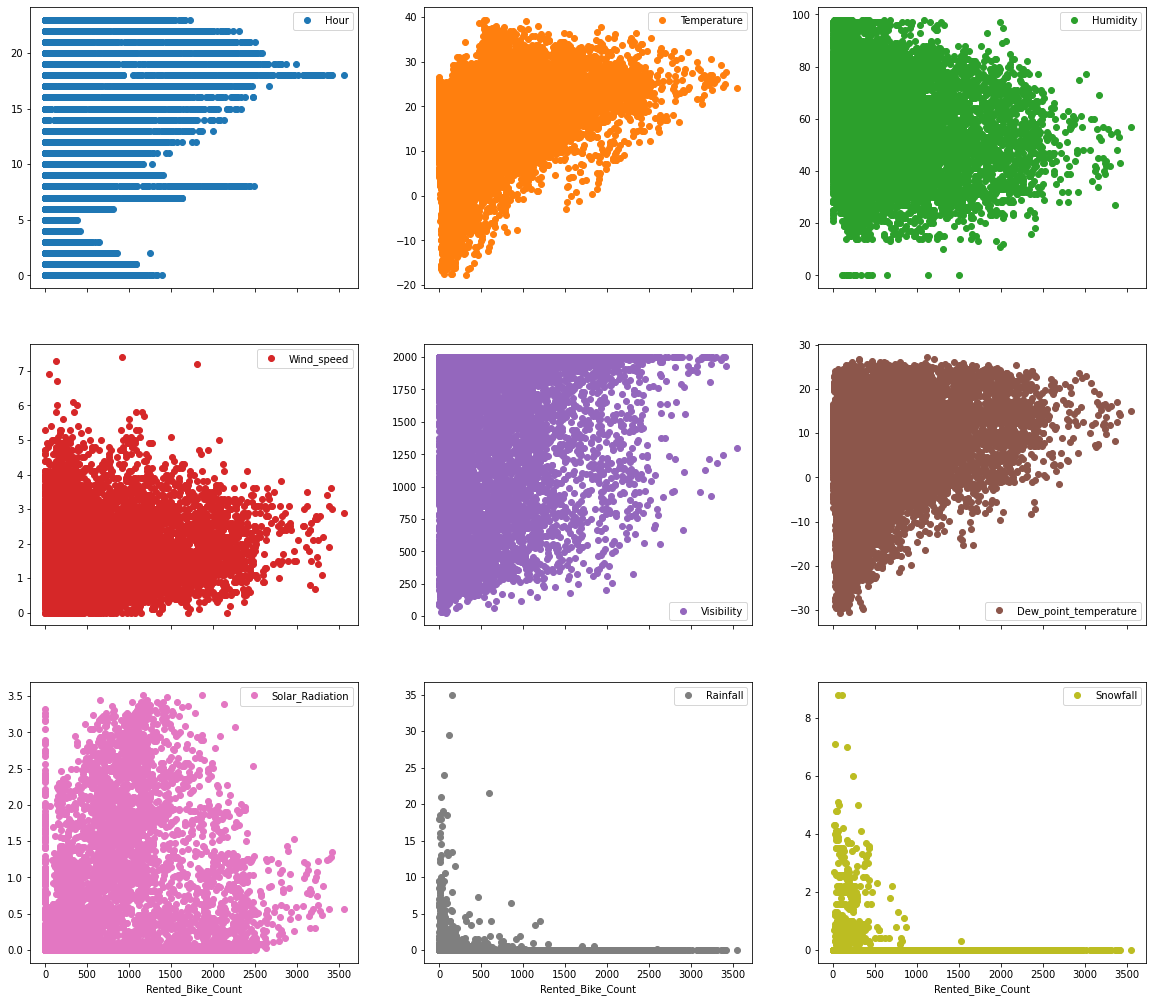

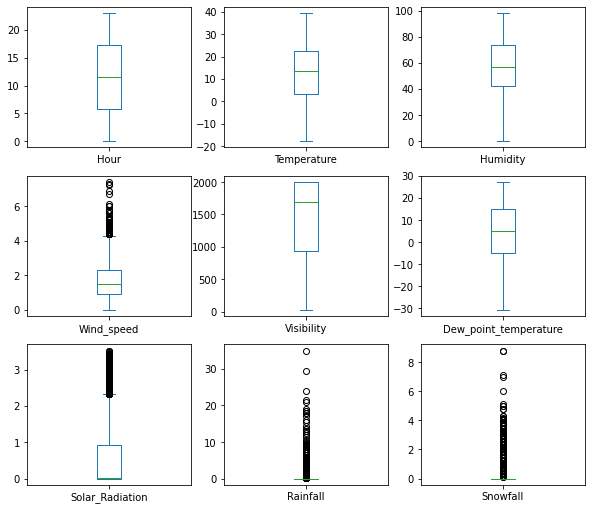

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekend_col              0
dtype: int64


In [33]:
### Visualizing
cols = df.columns.tolist()
cols.remove('Rented_Bike_Count')

# scatter plot
df.plot(kind="line", x="Rented_Bike_Count", y=cols, subplots=True, sharex=True, ls="none", marker="o",figsize=(20,30),layout=(5, 3))

# box plot
df.plot(kind="box", x="Rented_Bike_Count", y=cols, subplots=True, sharex=True,figsize=(10,15),layout=(5, 3))
plt.show()

# show the non-numerical entries
print(np.sum(df.isna()))

# Categorical columns eda 

In [34]:
categorical_df.columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekend_col'],
      dtype='object')

Text(0.5, 1.0, 'Count of Rented bikes acording to Month')

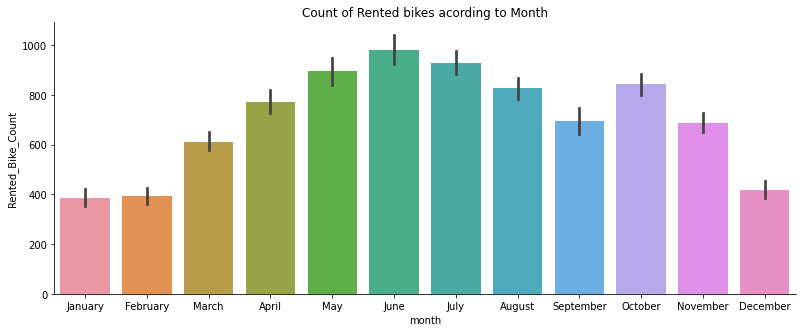

In [35]:
# first by months

sns.catplot(x = 'month' , y = 'Rented_Bike_Count' ,kind = 'bar', height= 4.5, aspect = 2.5 , data = df)
plt.title("Count of Rented bikes acording to Month")

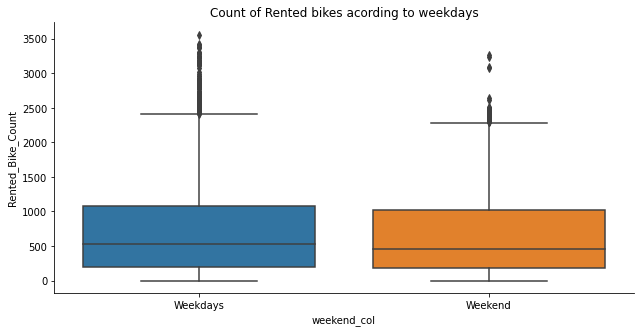

In [36]:
# now by weekday and weekend

sns.catplot( x= 'weekend_col' ,  y = 'Rented_Bike_Count' , data = df , kind = 'box' , height = 4.5, aspect = 2.0 )
plt.title('Count of Rented bikes acording to weekdays')
plt.show()


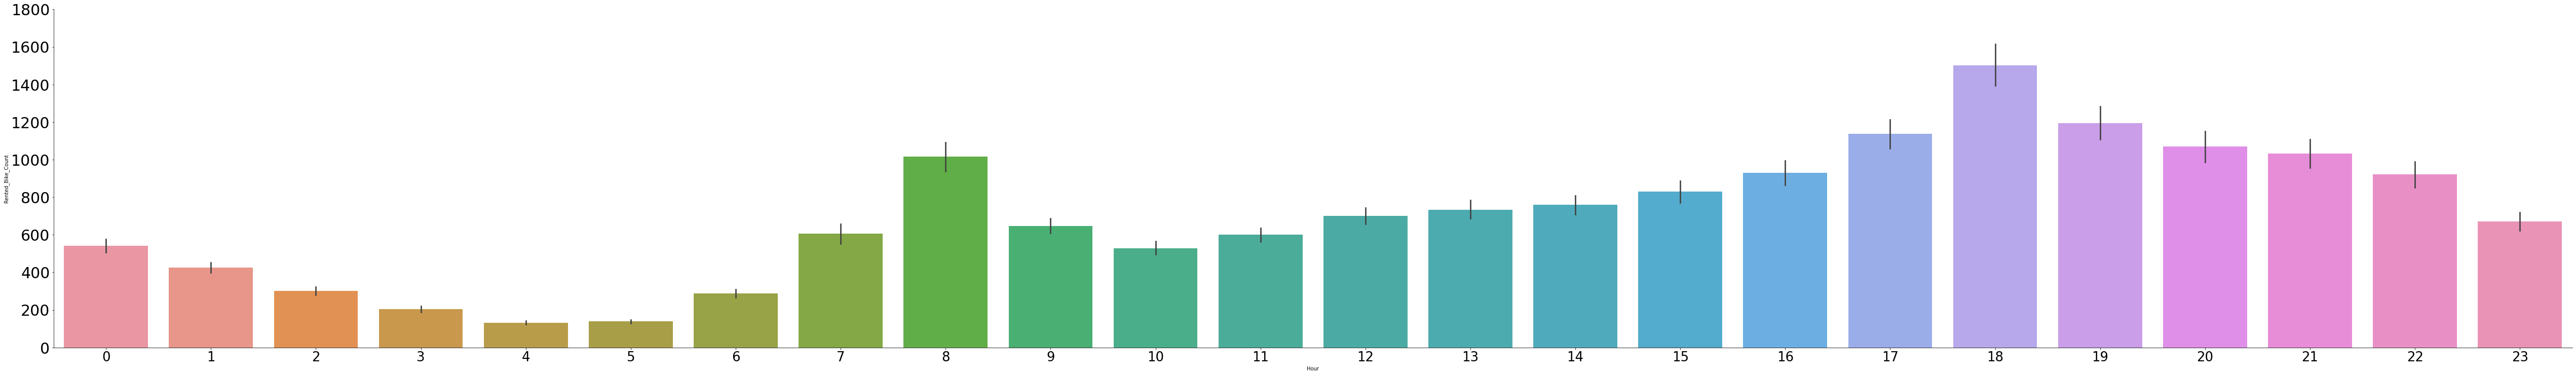

In [37]:
# now by hour coulmns 
res = sns.catplot(x= 'Hour' , y= 'Rented_Bike_Count' , data = df , kind= 'bar' , height = 10.0 , aspect = 7.0)
res.set_xticklabels(fontsize = 26)
res.set_yticklabels(fontsize = 30)



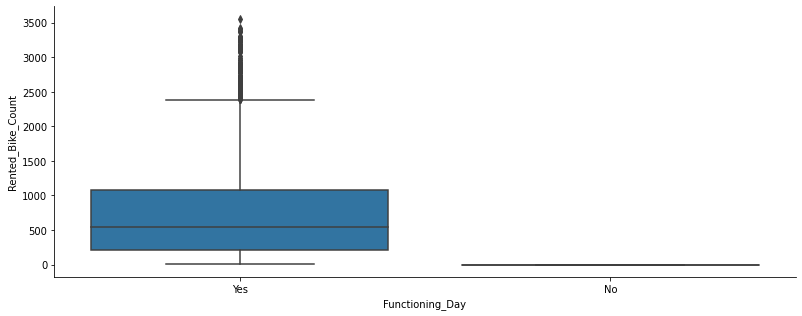

In [38]:
# now on the basis of functioning day 

sns.catplot(x = 'Functioning_Day',y = 'Rented_Bike_Count',data = df , kind = 'box' , height = 4.5, aspect = 2.5 )

Text(0.5, 1.0, 'count od rented bike acc to season')

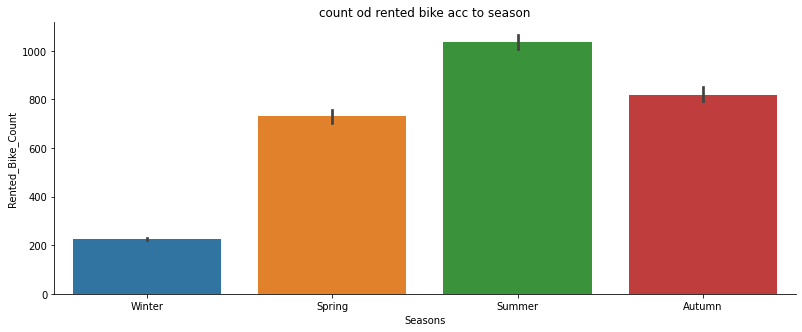

In [39]:
# by season now 
sns.catplot(x = 'Seasons' , y = 'Rented_Bike_Count' , data = df , kind = 'bar' , height = 4.5 , aspect = 2.5 )
plt.title('count od rented bike acc to season')

Text(0.5, 1.0, 'count od rented bike acc to holidays ')

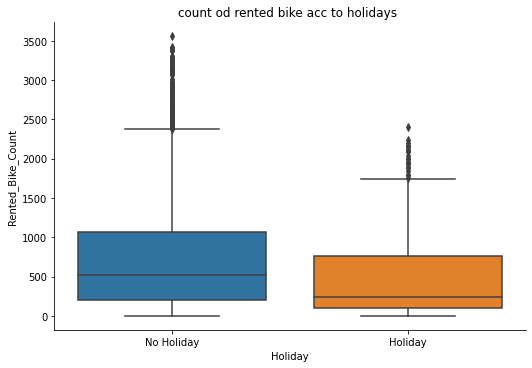

In [40]:
# now by holidays 

sns.catplot(x= 'Holiday' , y = 'Rented_Bike_Count' , data = df , kind = 'box' , height = 5.0 , aspect = 1.5)
plt.title("count od rented bike acc to holidays ")

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

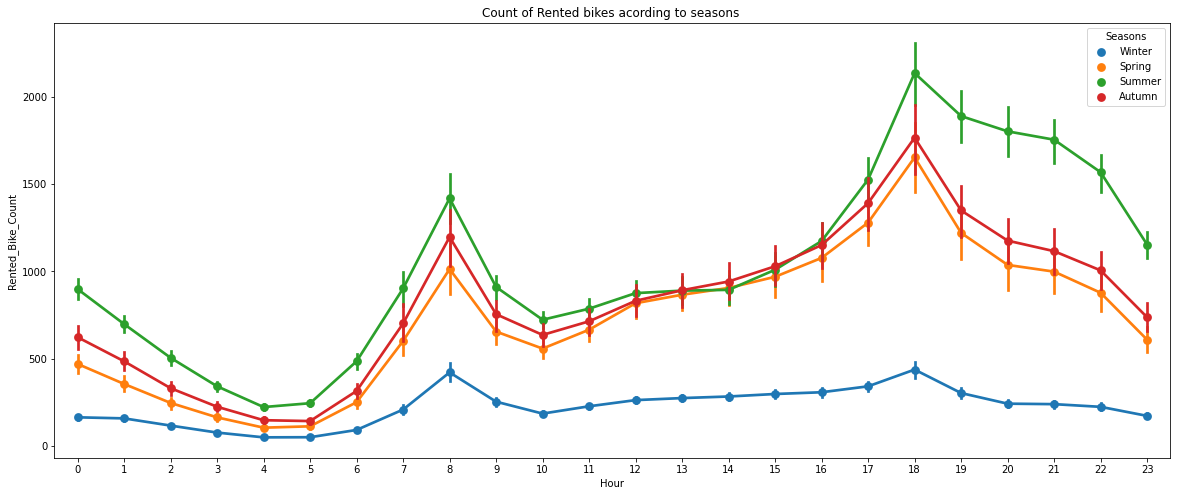

In [41]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

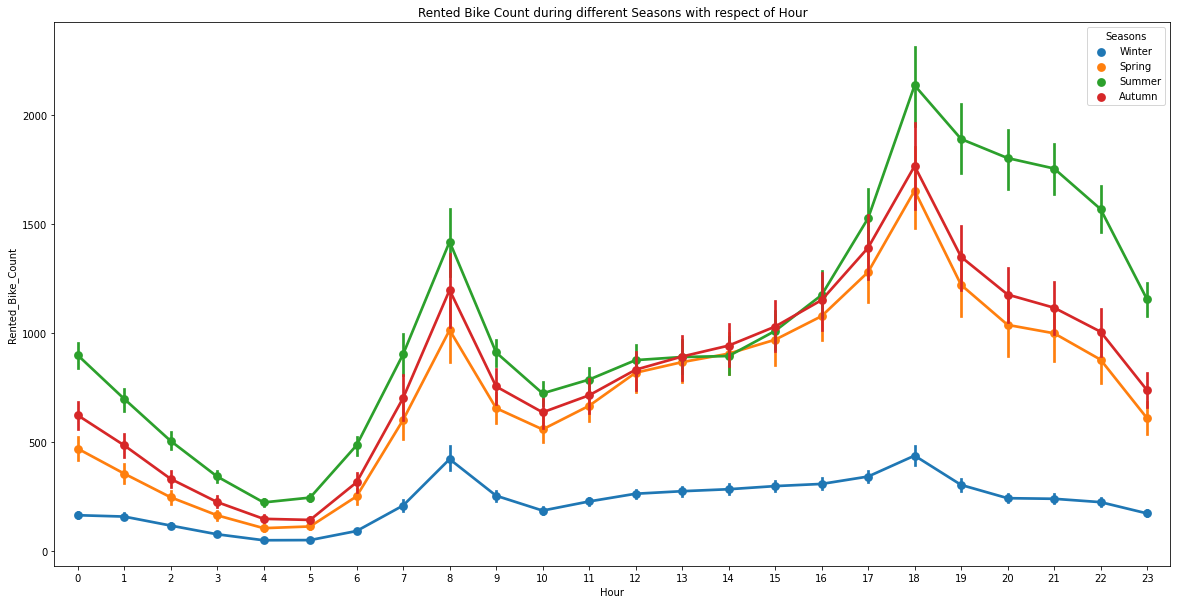

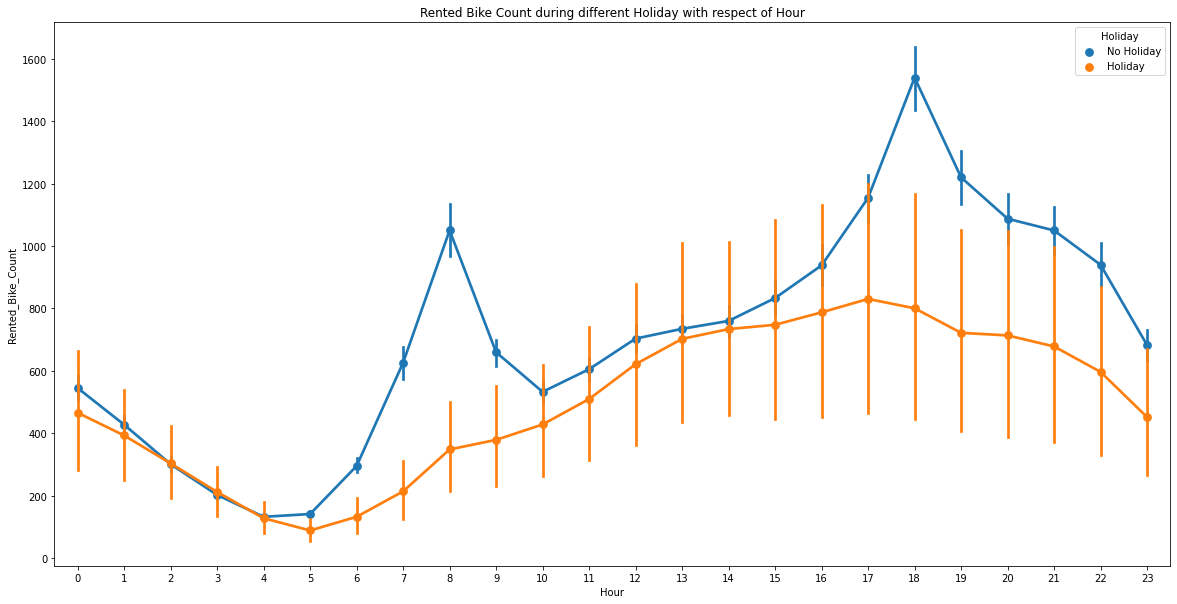

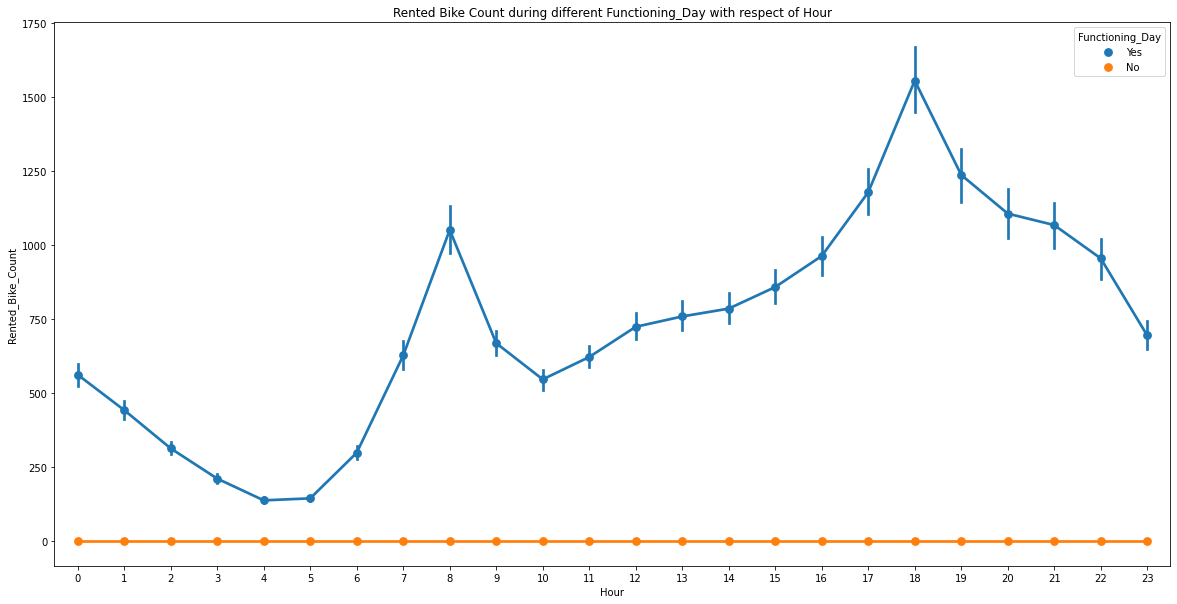

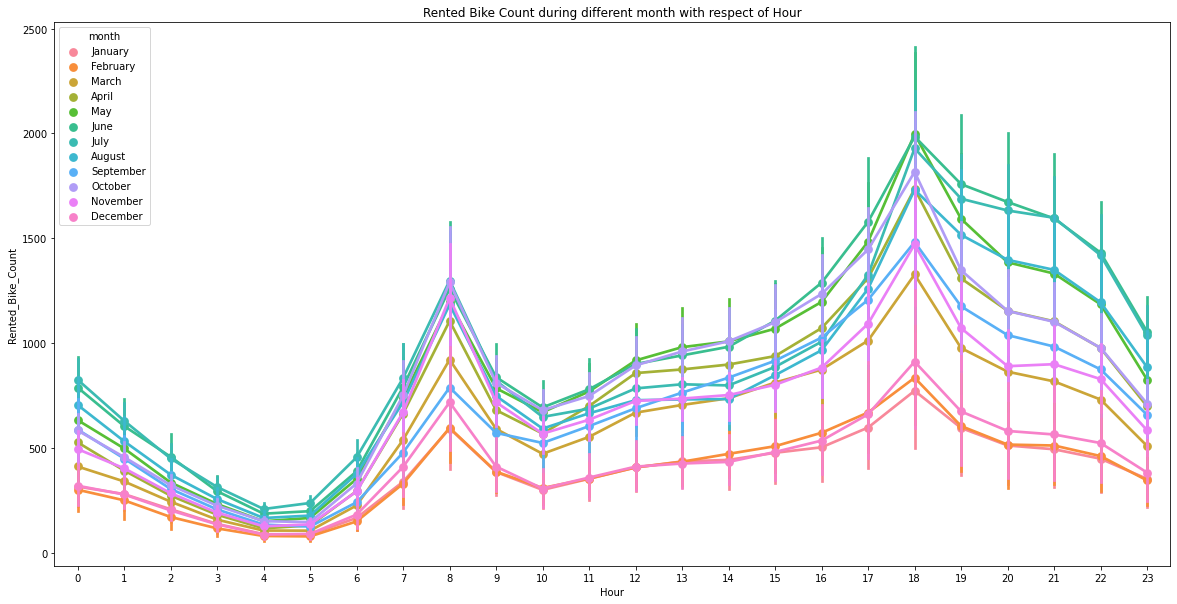

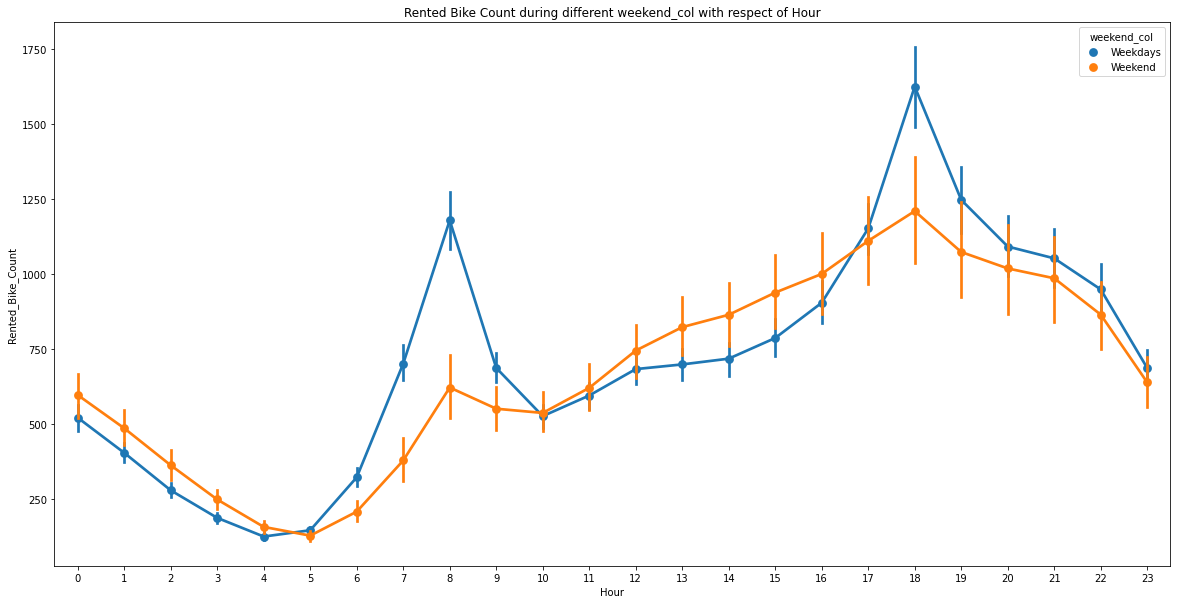

In [42]:
# create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_df.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

###### now focus on  numerical columns 

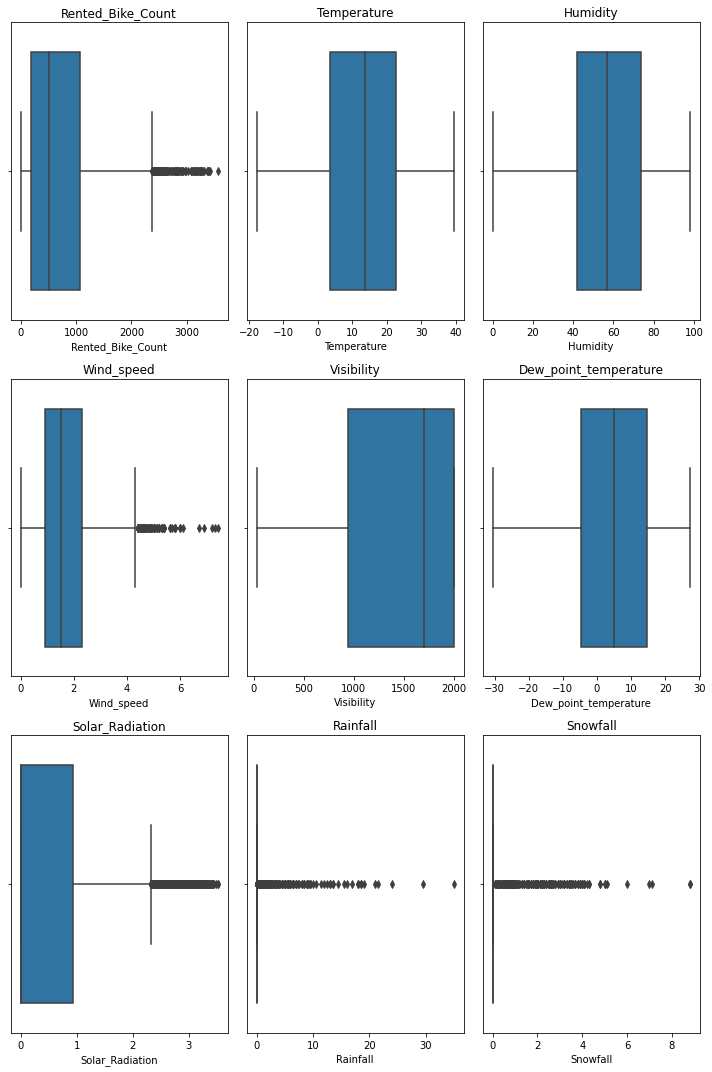

In [43]:
# boxplot to check outliers in numerical columns 
n = 1
plt.figure(figsize=(10,15))

for col in numeric_df.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.tight_layout()

# since if we remove outlier from rainfall and snowfall column it will remove all of ur data so avoid them now

In [44]:
numeric_df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

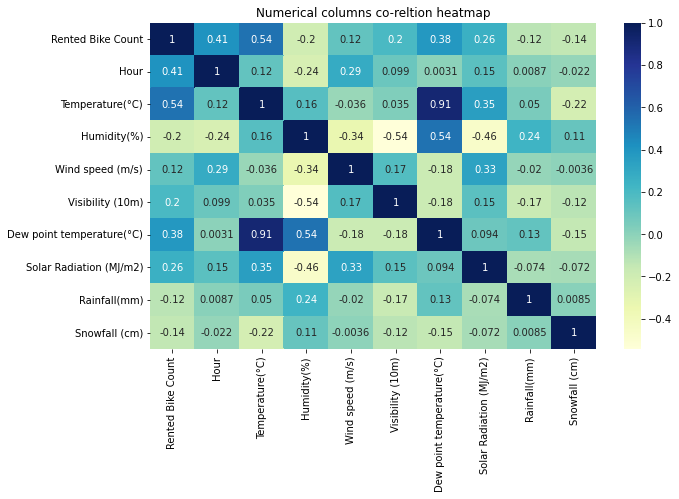

In [45]:
# Heatmap of all variables against each other to see ther co-relations
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title("Numerical columns co-reltion heatmap")
plt.show()

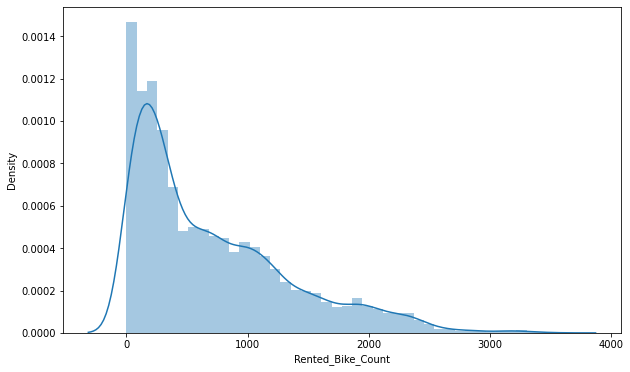

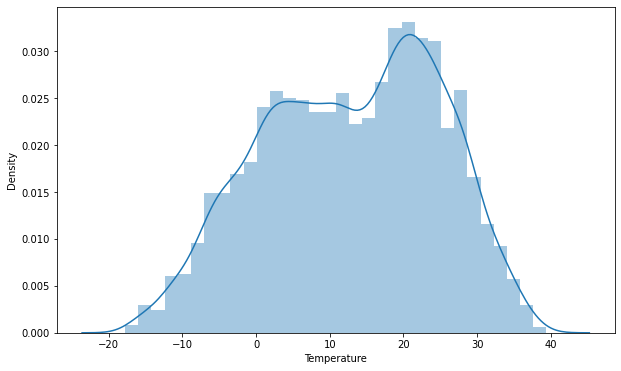

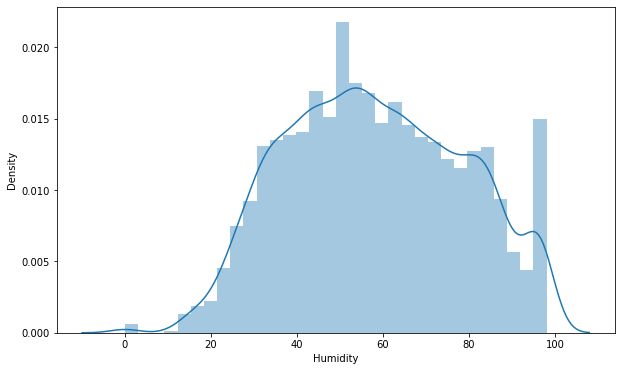

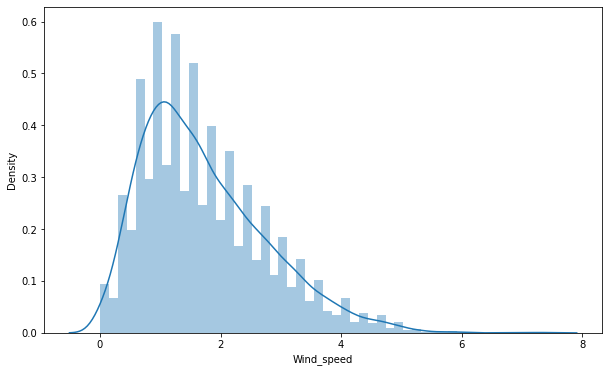

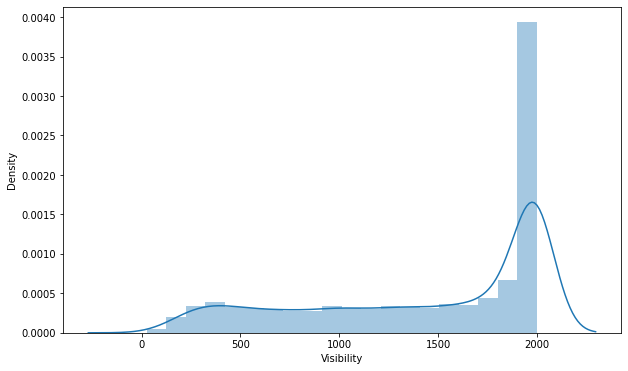

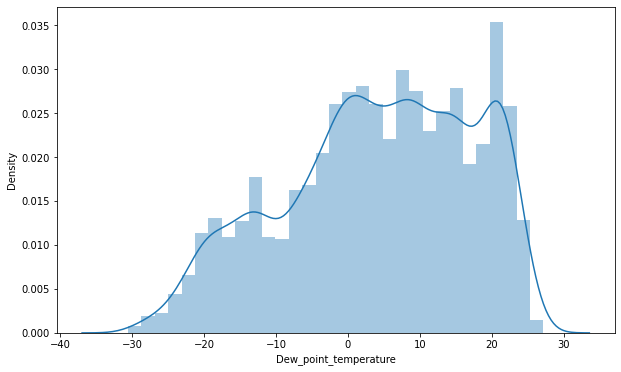

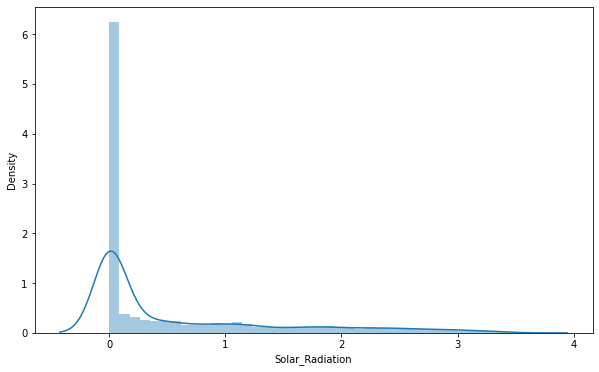

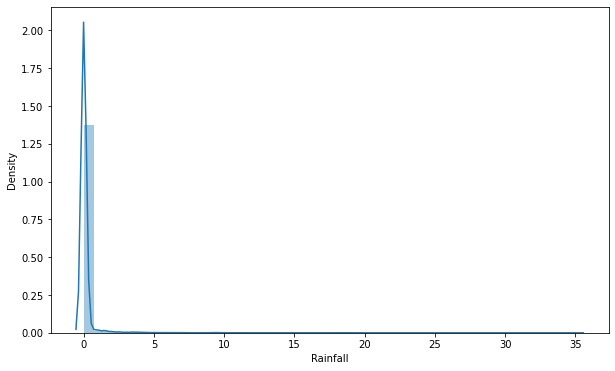

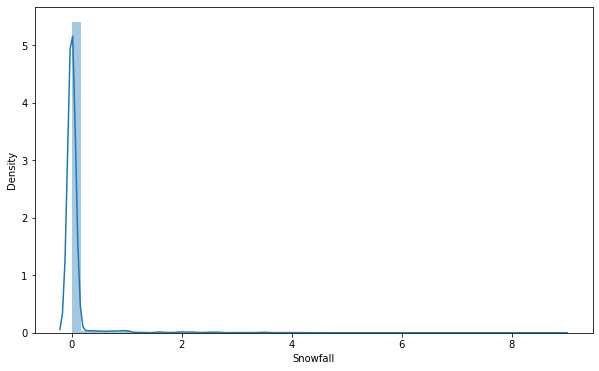

In [46]:
#printing displots to analyze the distribution of all numerical features
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

Numerical vs.Rented_Bike_Count

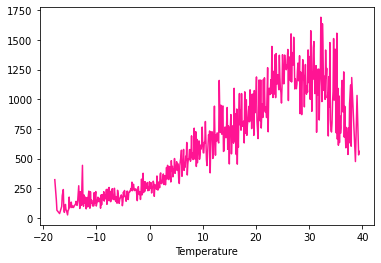

In [47]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot(color='deeppink')

From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average

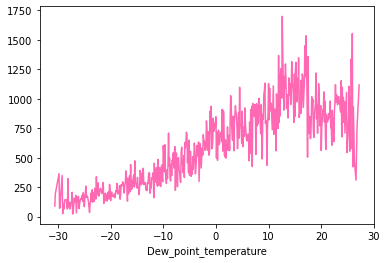

In [48]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot(color='hotpink')

From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.

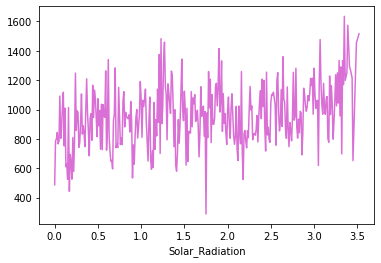

In [49]:

#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot(color="orchid")

from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

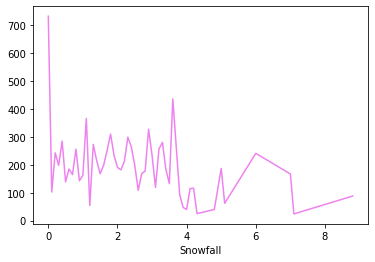

In [50]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot(color="violet")

We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower

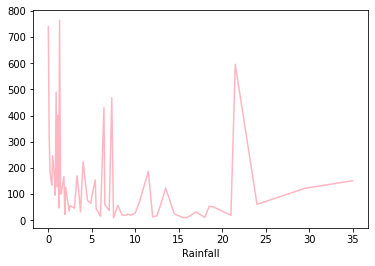

In [51]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot(color="lightpink")

We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes

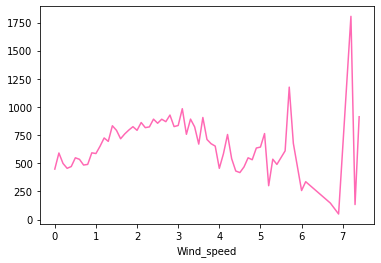

In [52]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot(color="hotpink")

We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.

In [53]:
# take a look at vmaximum value of each column to get an idea about outlier

print(df['Wind_speed'].max())
print(df['Solar_Radiation'].max())


7.4
3.52


In [54]:
# according to upper bound and lower bound for iqr of each column 

df.loc[df['Solar_Radiation']>=2,'Solar_Radiation']= 2
df.loc[df['Wind_speed' ]>=4,'Wind_speed']= 4

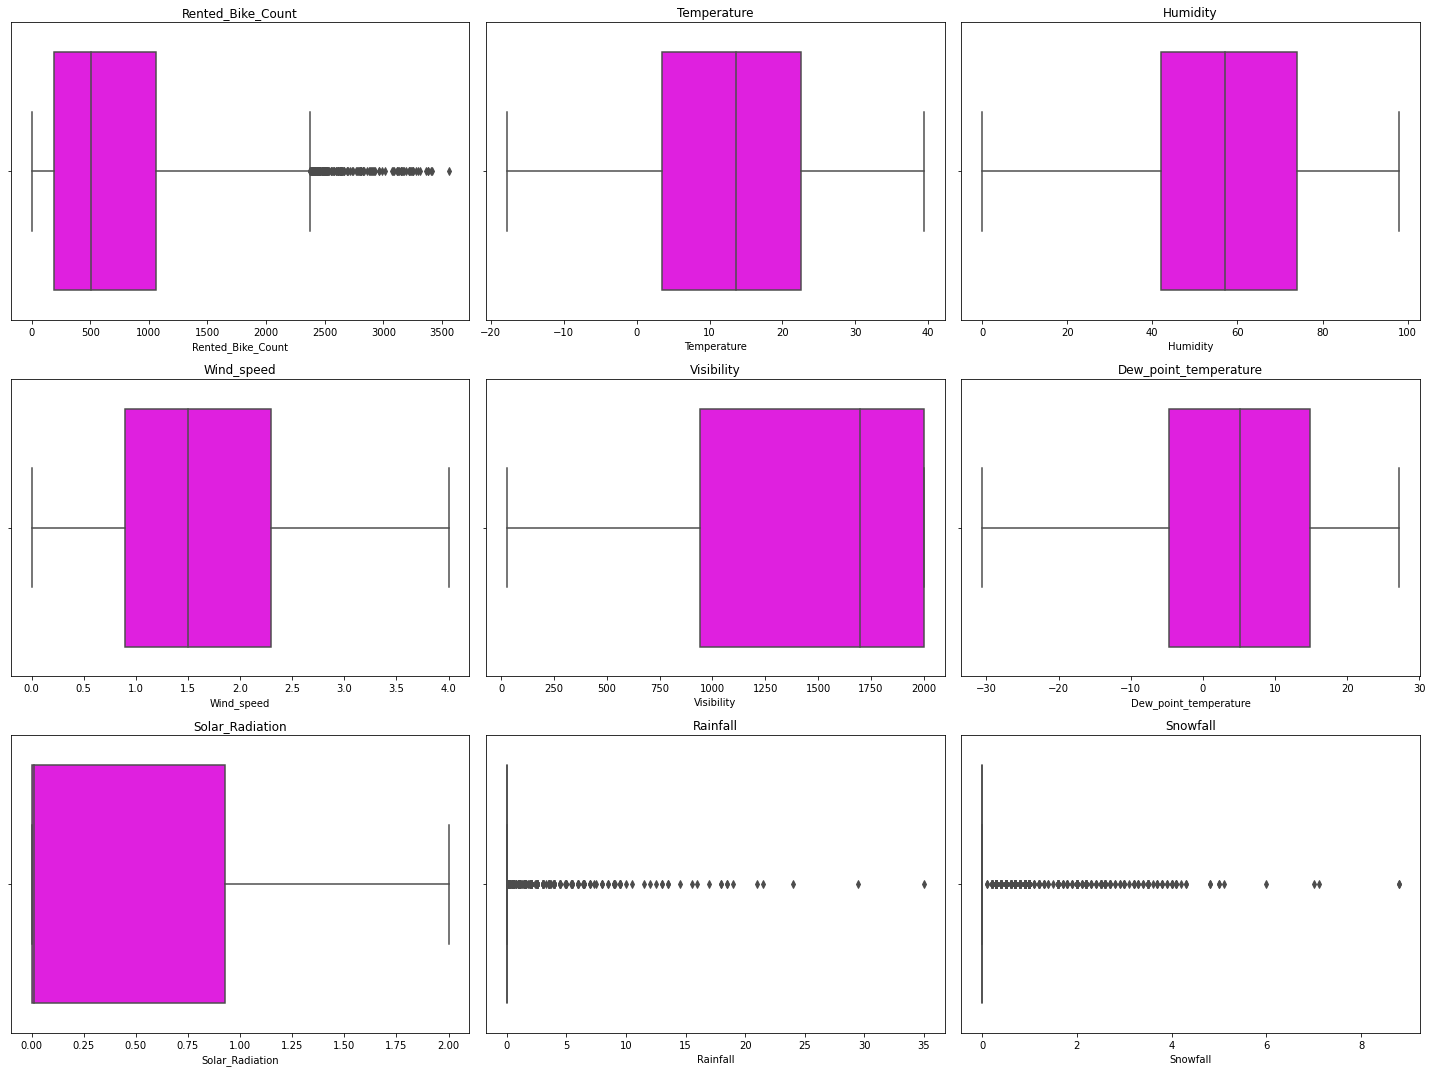

In [55]:
# and checking outliers again
 
n = 1
plt.figure(figsize=(20,15))

for col in numeric_df.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[col],color='magenta')
  plt.title(col)
  plt.xlabel(col)
  plt.tight_layout()

In [56]:
# now we need to treat this outlier and we can use caaping for it 
# according to upper bound and lower bound for iqr of each column 


df.loc[df['Solar_Radiation']>=2,'Solar_Radiation']= 2
df.loc[df['Wind_speed' ]>=4,'Wind_speed']= 4




Now we are moving ahead to find relation b/w our numerical independent column with rented bike column with help of regression plot


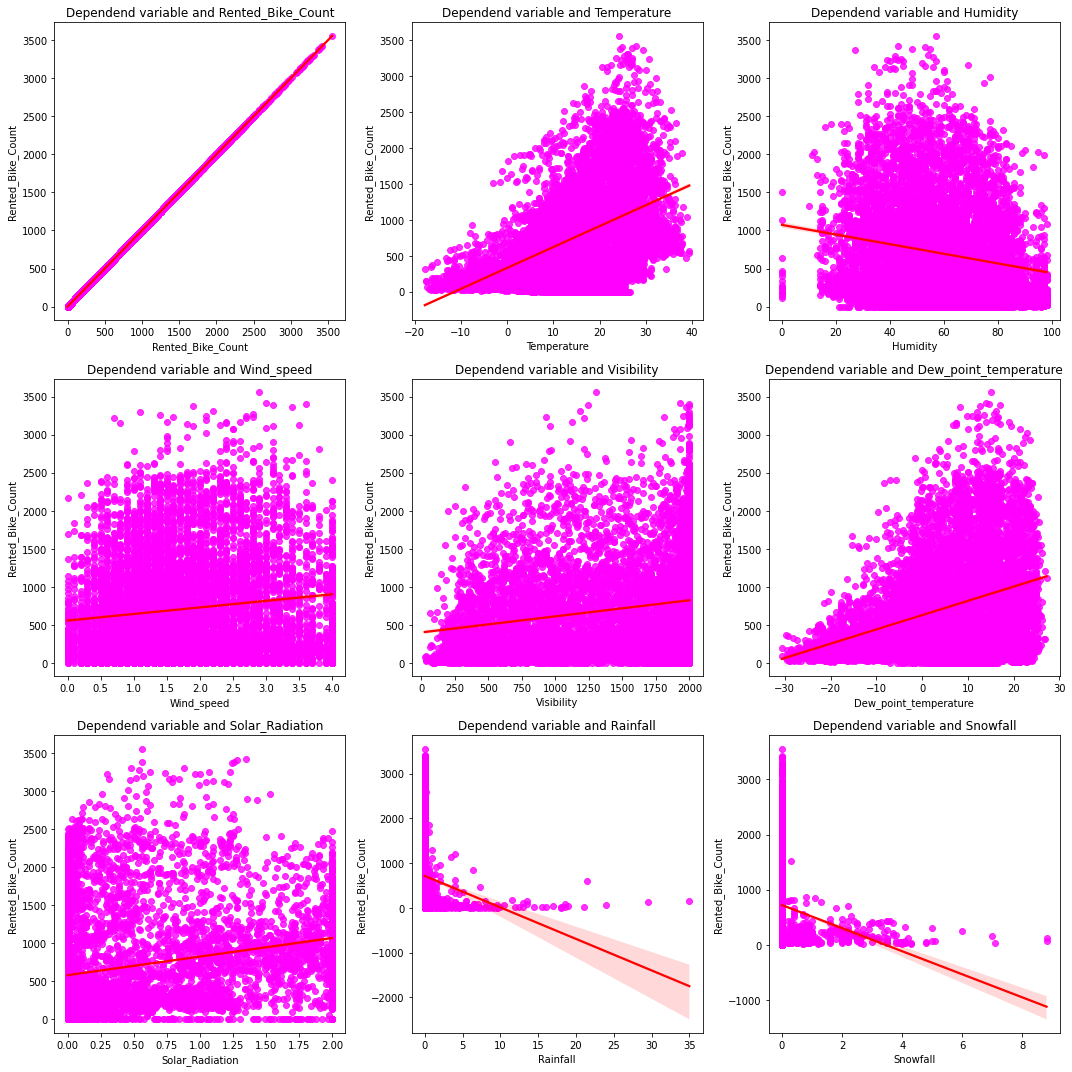

In [57]:
# to know relation with rented bike count with numerical columns
n=1
plt.figure(figsize=(15,15))
for i in numeric_df.columns :
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(3,3,n )
    n += 1
    sns.regplot(df[i], df['Rented_Bike_Count'] , scatter_kws={"color": "magenta"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

In [58]:
# now take a one look at these column max value to look at outlier problem

print(df['Wind_speed'].max())
print(df['Solar_Radiation'].max())

4.0
2.0


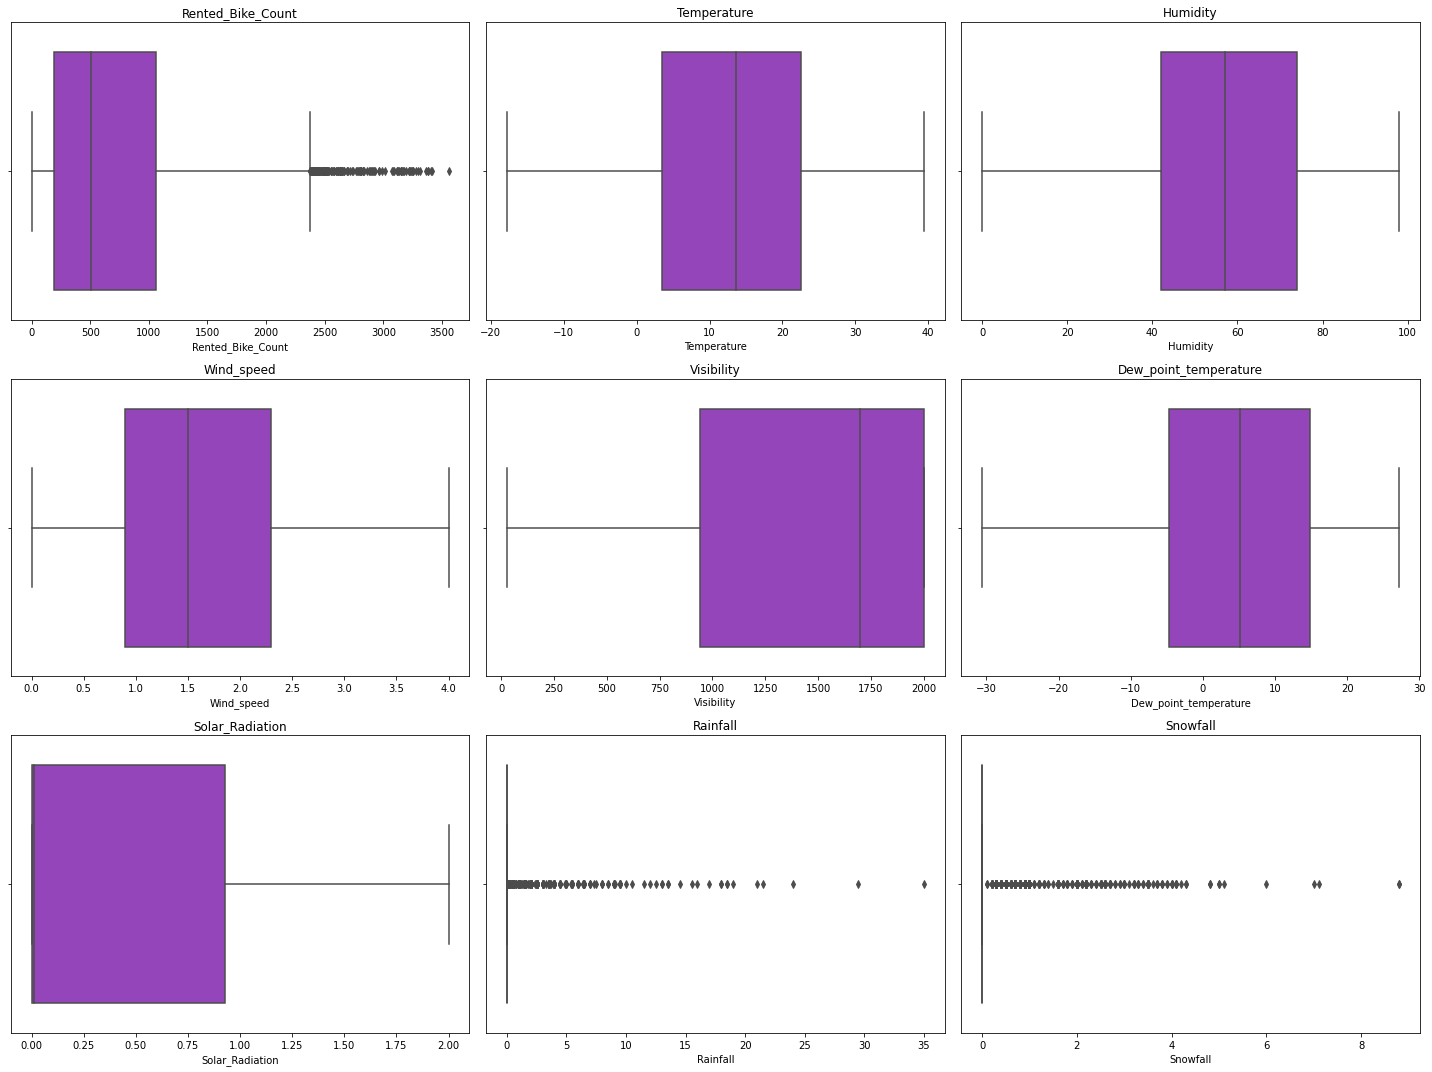

In [59]:
# and again checking outliers again by emans of box plot 
 
n = 1
plt.figure(figsize=(20,15))

for col in numeric_df.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[col],color='darkorchid')
  plt.title(col)
  plt.xlabel(col)
  plt.tight_layout()

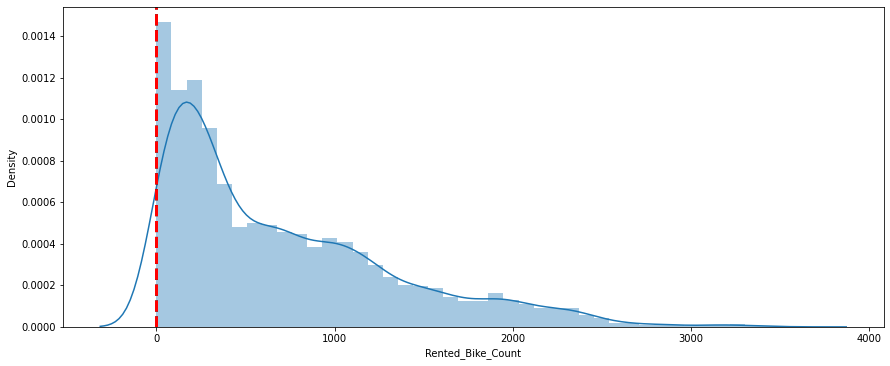

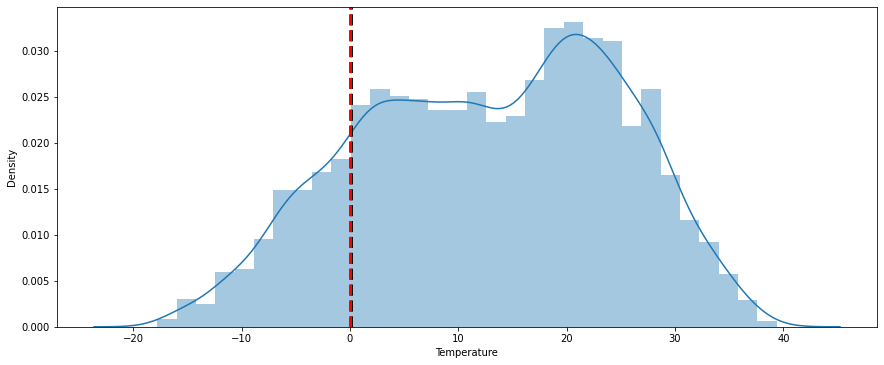

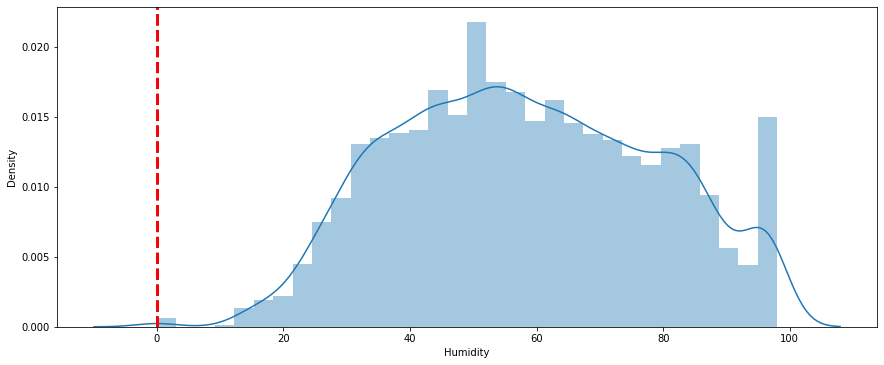

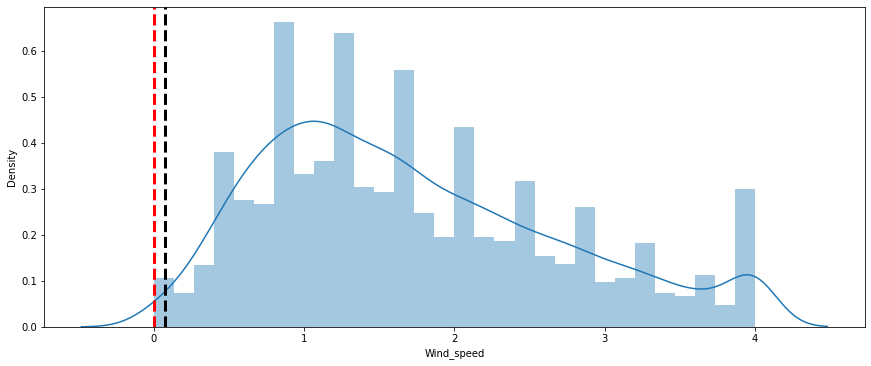

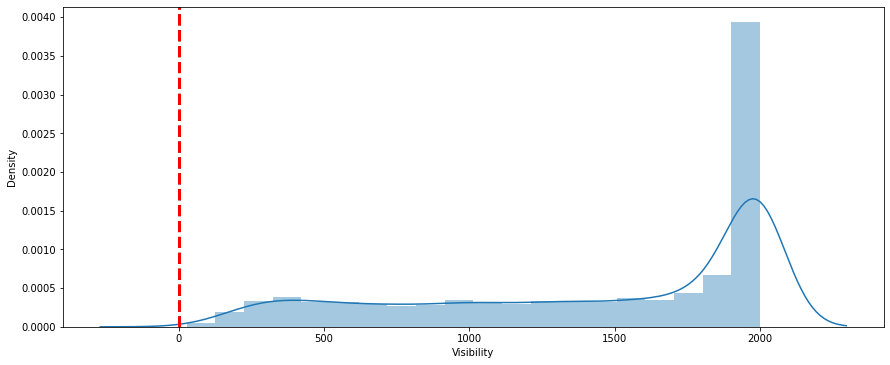

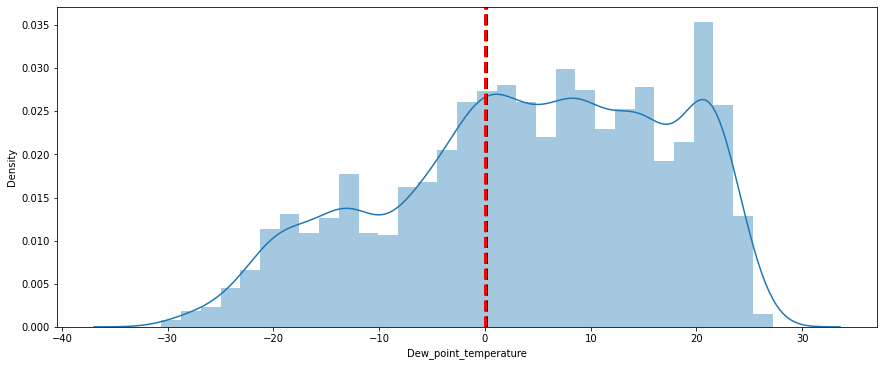

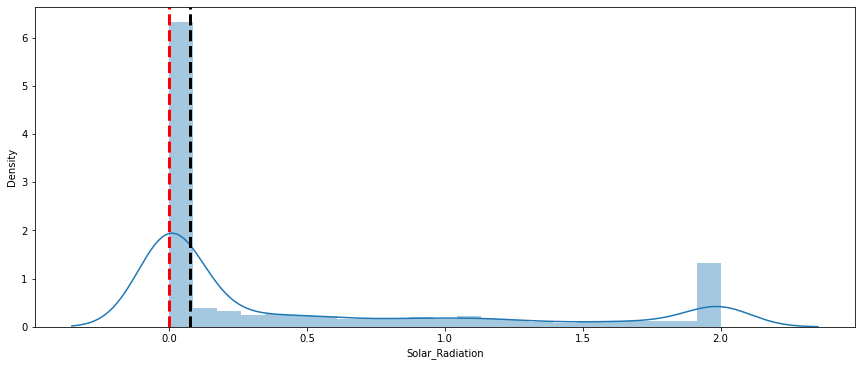

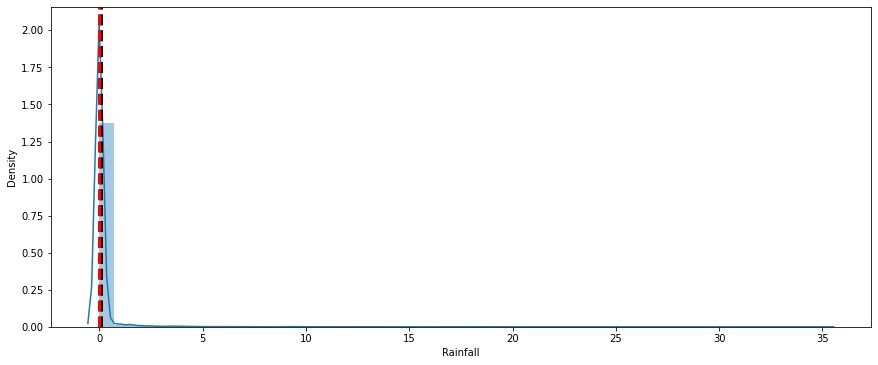

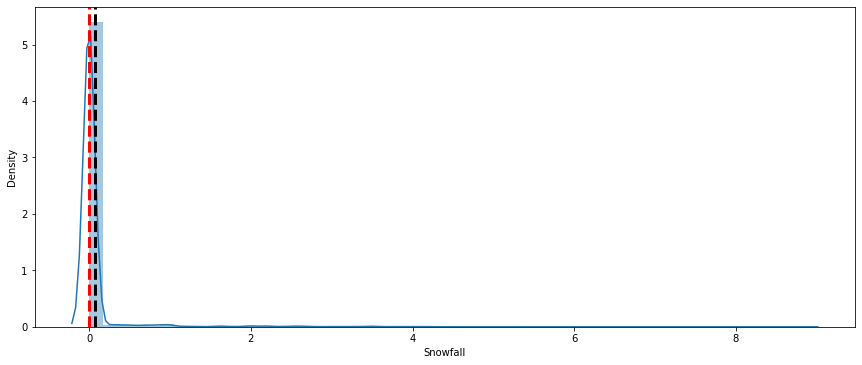

In [60]:
n = 1 
for col in numeric_df.columns :
  plt.figure(figsize = (50,20))
  plt.subplot(3,3 ,n ) 
  n += 1 
  sns.distplot(df[col])
  feature = df[i]
  plt.axvline(feature.mean(), color='black', linestyle = 'dashed' , linewidth=3)
  plt.axvline(feature.median(), color='red', linestyle='dashed', linewidth=3)
  plt.show()

# Regression plot
The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

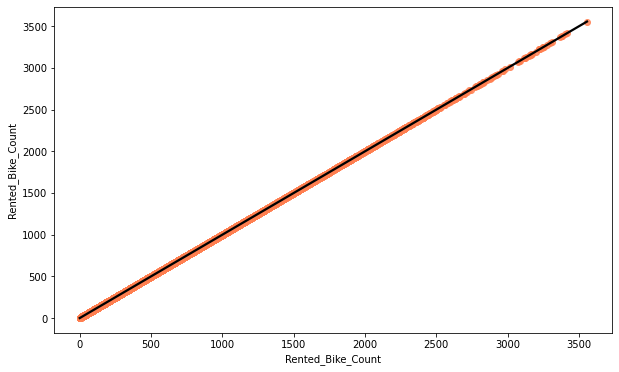

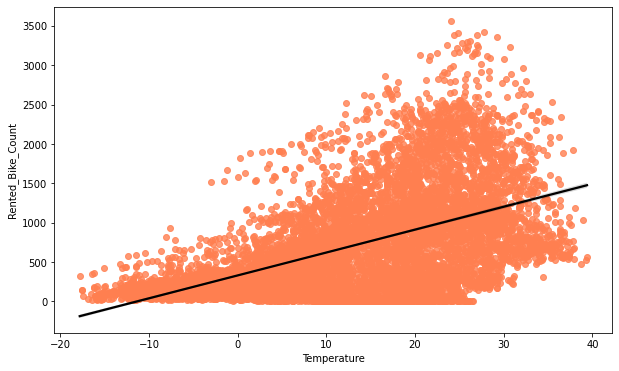

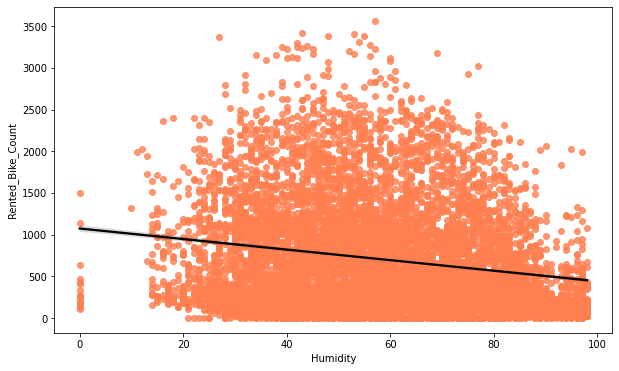

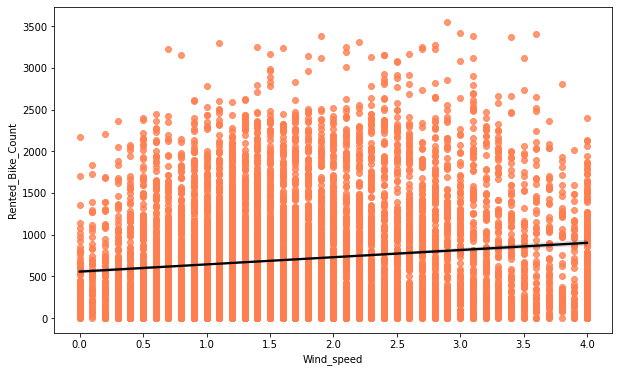

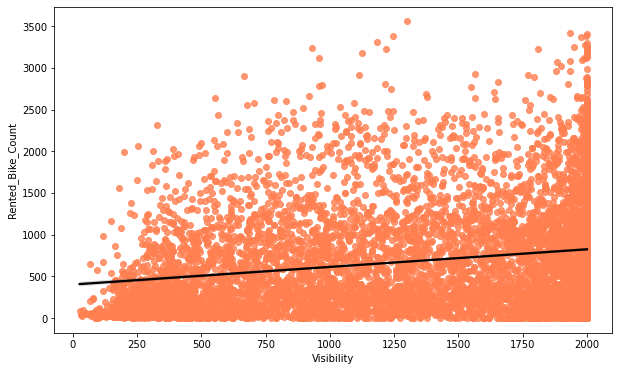

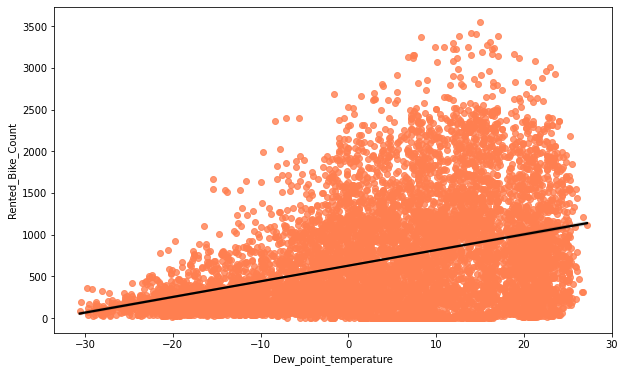

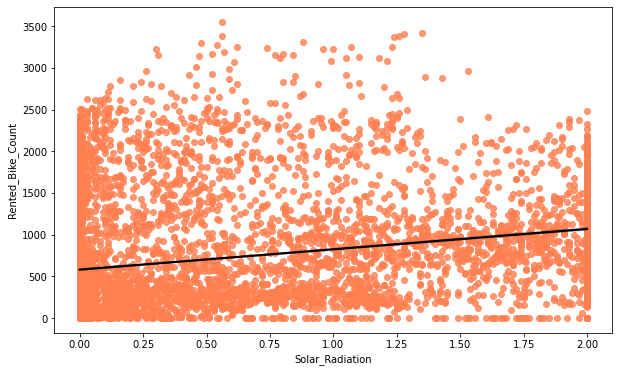

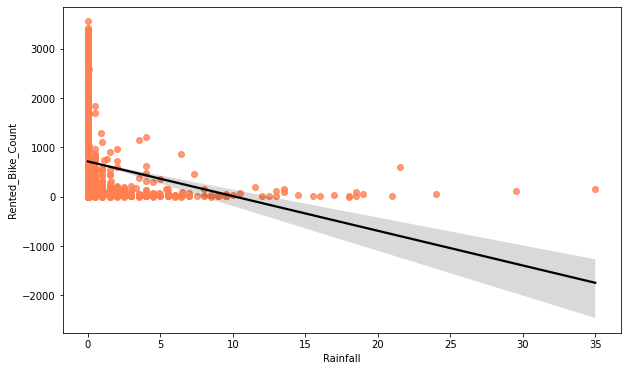

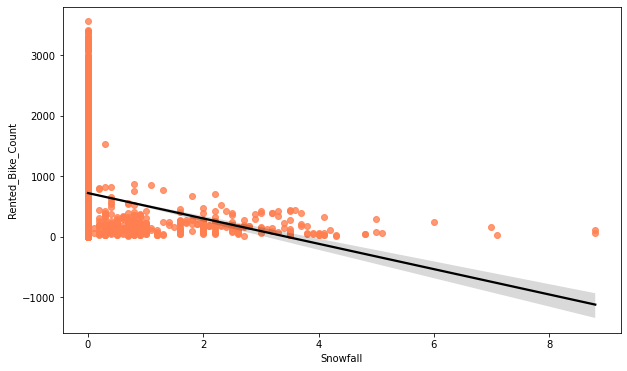

In [61]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'coral'}, line_kws={"color": "black"})

# Distplot plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms
#Right skewed columns are Rented Bike Count (Its also our Dependent variable), Wind_speed, Solar_Radiation, Rainfall(mm), Snowfall (cm) and 
# Left skewed columns ar# Visibility (10m), Dew point temperature(°C)
# From Histogram we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen .


* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to normalize it.***

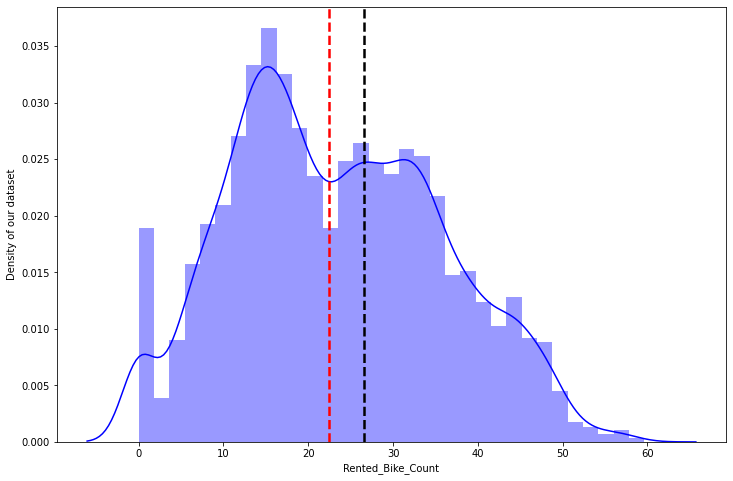

In [62]:
plt.figure(figsize = (12 ,8))
plt.xlabel("Rented  Bike Count")
plt.ylabel("Density of our dataset") 

ax = sns.distplot(np.sqrt(df['Rented_Bike_Count']) , color = "blue")
ax.axvline(np.sqrt(df['Rented_Bike_Count'].mean()) , color = 'black' , linestyle = 'dashed' , linewidth = 2.5)
ax.axvline(np.sqrt(df['Rented_Bike_Count'].median()) , color = 'red' , linestyle = 'dashed' , linewidth = 2.5)




# Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution

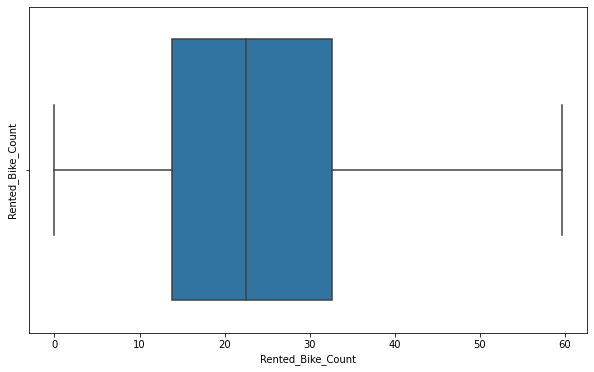

In [63]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

# Checking of Correlation between variables

In [64]:
 ## now corelation b/w the  dependent varaiables with rented bike count

df.corr()['Rented_Bike_Count']

Rented_Bike_Count        1.000000
Temperature              0.538558
Humidity                -0.199780
Wind_speed               0.131549
Visibility               0.199280
Dew_point_temperature    0.379788
Solar_Radiation          0.272995
Rainfall                -0.123074
Snowfall                -0.141804
Name: Rented_Bike_Count, dtype: float64

we observed smilar things in regression plot also where some feature are negatively correlated and some positively correalted with depend var 

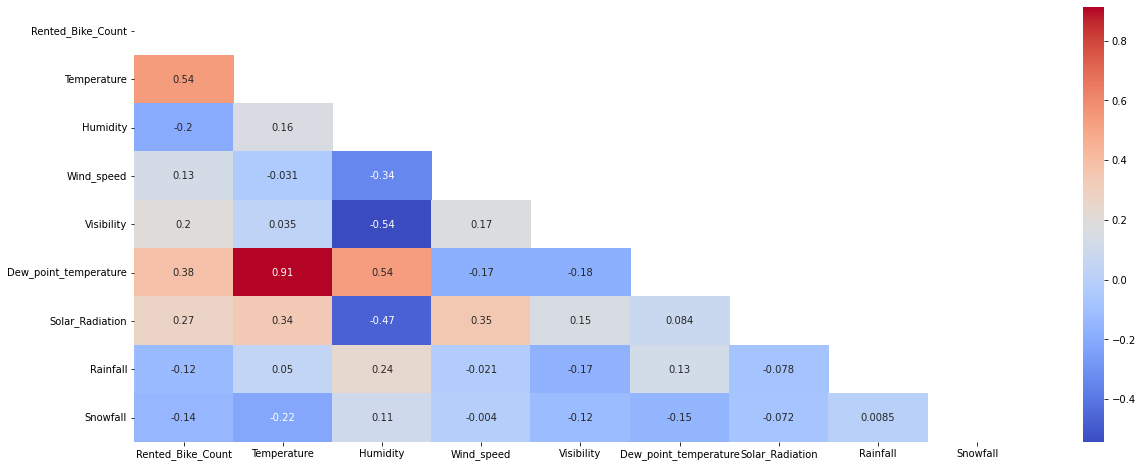

In [65]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.

In [66]:
# dropping dew point column
df.drop(['Dew_point_temperature'] , axis = 1 , inplace = True)

# one hot encoding

###### one hot encoding to convert categorical into numerical columns for better alaysis


In [67]:
df_enc = df.copy()

def one_hot_encoding(data , column ) :
  data = pd.concat([data , pd.get_dummies(data[column] , prefix = column , drop_first = True)] , axis = 1)
  data = data.drop([column], axis =1 )
  return data

for col in categorical_df :
  df_enc = one_hot_encoding(df_enc , col )
df_enc.head()


,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekend_col_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
# now multicolinearity with te help of vif
# make vif calculate function


from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [69]:
# now cal vif our feature columns 
calc_vif(df_enc[[i for i in df_enc.describe().columns if i not in ['Rented_Bike_Count',]]] )

,variables,VIF
0,Temperature,13.753229
1,Humidity,19.281318
2,Wind_speed,5.654183
3,Visibility,9.011591
4,Solar_Radiation,7.827087
5,Rainfall,1.117934
6,Snowfall,1.168799
7,Hour_1,1.860490
8,Hour_2,1.861176
9,Hour_3,1.861812


In [70]:
# now we will seprate our datasets dependent and indepent and dependent columns 

X = df_enc.drop(columns = ['Rented_Bike_Count'] , axis  = 1)
Y = np.sqrt(df_enc['Rented_Bike_Count'])

In [71]:
X.shape

(8760, 47)

In [72]:
Y.shape

(8760,)

# Model Training

Train Test split for regression

In [73]:
# now test, train and split database 

from sklearn.model_selection import train_test_split 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 1)
print(X_train.shape)
print(X_test.shape)


(7008, 47)
(1752, 47)


In [74]:
df_enc.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September',
       'weekend_col_Weekend'],
      dtype='object')

# now we will go toward model building

Linear Regression

In [75]:
# import linear  regression and make its object
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, Y_train)

In [76]:
# accuracy score on training dataset
reg.score(X_train , Y_train )

0.7571257585290007

In [77]:
#check the coefficeint
reg.coef_

array([ 4.53961902e-01, -1.36448030e-01, -1.95455754e-01,  3.54963949e-04,
        1.87853630e+00, -1.47158645e+00,  1.50061741e-02, -2.30512702e+00,
       -4.95599051e+00, -7.59703037e+00, -9.79483575e+00, -9.24764341e+00,
       -4.42471705e+00,  1.59258571e+00,  7.09613958e+00,  3.24151764e-01,
       -4.58871428e+00, -4.45953164e+00, -4.15054661e+00, -4.10160848e+00,
       -4.10565248e+00, -2.73155416e+00, -9.19397993e-01,  3.18504081e+00,
        9.77948794e+00,  6.89849605e+00,  6.05589322e+00,  6.26535648e+00,
        4.92119113e+00,  1.53315673e+00, -3.06141997e+00, -3.49724448e+00,
       -7.00240428e+00,  2.73201611e+00,  2.80255600e+01, -7.89283179e-01,
        8.64866448e-01, -1.20112149e+00, -3.54759368e-01, -1.27373589e-01,
        3.58641648e+00,  4.76447050e-02,  1.33355136e+00,  6.05851875e-01,
        1.52801436e+00, -3.36057800e-01, -7.08086148e-01])

In [78]:
#get the X_train and X-test value
Y_train_pred=reg.predict(X_train)
Y_test_pred=reg.predict(X_test)

In [79]:
#import the packages
#Score matrics on train data
print(f"Linear regression training set metrics:")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE_lr1 = ( mean_squared_error(Y_train, Y_train_pred))
print("MSE", MSE_lr1)

MAE_lr1 = (mean_absolute_error(Y_train, Y_train_pred))
print("MAE", MAE_lr1)

RMSE_lr1 = (np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
print("RMSE", RMSE_lr1)

R2_score_lr1 = r2_score(Y_train, Y_train_pred)
print("R2_score", R2_score_lr1)

Adjusted_r2_lrl = (1-(1-r2_score(Y_train, Y_train_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2" , Adjusted_r2_lrl)
print()



Linear regression training set metrics:
MSE 37.71106685586818
MAE 4.684140649713963
RMSE 6.140933712056187
R2_score 0.7571257585290007
Adjusted_r2 0.7504267624320893



In [80]:
#Score matrics on test data
print(f"Linear regression testing set metrics:")

MSE_lr2 = ( mean_squared_error(Y_test, Y_test_pred))
print("MSE", MSE_lr2)

MAE_lr2 = (mean_absolute_error(Y_test, Y_test_pred))
print("MAE", MAE_lr2)

RMSE_lr2 = (np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
print("RMSE", RMSE_lr2)

R2_score_lr2 = r2_score(Y_test, Y_test_pred)
print("R2_score", R2_score_lr2)

Adjusted_r2_lr2 = 1-((1-R2_score_lr2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_r2" , Adjusted_r2_lr2)

Linear regression testing set metrics:
MSE 35.047775178406056
MAE 4.5328613410583145
RMSE 5.920116145685493
R2_score 0.7723257999923797
Adjusted_r2 0.766046053865409


In [81]:
reg.intercept_

-1.2299402228306526


The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

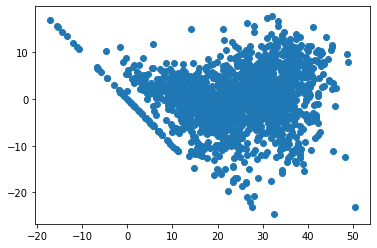

In [82]:
### Heteroscadacity
plt.scatter((Y_test_pred),(Y_test)-(Y_test_pred))

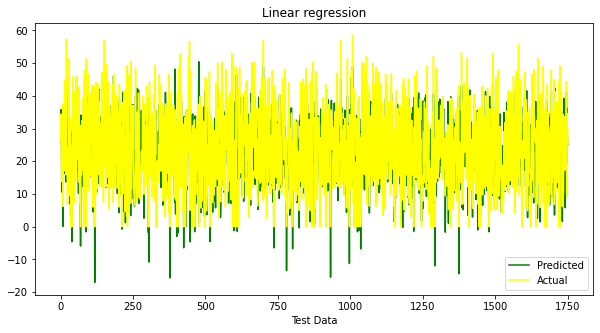

In [83]:
#visualization
plt.figure(figsize=(10,5))
plt.plot((Y_test_pred), color = 'green')
plt.plot(np.array(Y_test), color = 'yellow')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.title("Linear regression")
plt.show()

In [84]:
# creating a dict to concat linear training and test data score metrics
# storing the train set metrics value in a dict for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr1),2),
       'MSE':round((MSE_lr1),2),
       'RMSE':round((RMSE_lr1),2),
       'R2_score':round((R2_score_lr1),2),
       'Adjusted R2':round((Adjusted_r2_lrl),2)
       }
lr_dict1 = pd.DataFrame(dict1,index=[1])
training_df=pd.DataFrame(dict1,index=[1])

# storing the test set metrics value in a dict for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr2),2),
       'MSE':round((MSE_lr2),2),
       'RMSE':round((RMSE_lr2),2),
       'R2_score':round((R2_score_lr2),2),
       'Adjusted R2':round((Adjusted_r2_lr2 ),2)
       }
lr_dict2 = pd.DataFrame(dict2,index=[1])
test_df=pd.DataFrame(dict2,index=[1])

In [85]:
# linear regression score for train and test data
result=pd.concat([lr_dict1,lr_dict2],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Linear regression,4.68,37.71,6.14,0.76,0.75
Test set,1,Linear regression,4.53,35.05,5.92,0.77,0.77


# LASSO REGRESSION

In [86]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
# Fit the Lasso model
lasso_regressor.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [87]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -38.4135617823079


In [88]:
lasso = Lasso(alpha=0.001, max_iter=1000)
lasso.fit(X_train, Y_train)
Y_pred_train_lasso = lasso.predict(X_train)                 
Y_pred_test_lasso = lasso.predict(X_test)                     
print(Y_pred_train_lasso)

[ 5.37993885 30.35977495 17.62279894 ... 22.18325695 32.78415709
 24.35373252]


In [89]:
#Score matrics on train data
print(f"Lasso training set metrics:")

MSE_lasso1 = (mean_squared_error(Y_train, Y_pred_train_lasso))
print("MSE", MSE_lasso1)

MAE_lasso1 = (mean_absolute_error(Y_train, Y_pred_train_lasso))
print("MAE", MAE_lasso1)

RMSE_lasso1 = (np.sqrt(mean_squared_error(Y_train, Y_pred_train_lasso)))
print("RMSE", RMSE_lasso1)

R2_lasso1 = r2_score(Y_train, Y_pred_train_lasso)
print('R2', R2_lasso1)

Adjusted_r2_lasso1 = 1-(1-(R2_lasso1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_lasso1)
print()



Lasso training set metrics:
MSE 37.712703974612026
MAE 4.683455764640985
RMSE 6.141067006197867
R2 0.7571152148343704
Adjusted_R2 0.7622279181529358



In [90]:
#Score matrics on test data
print(f"Lasso test set metrics:")

MSE_lasso2 = (mean_squared_error(Y_test, Y_pred_test_lasso))
print("MSE", MSE_lasso2)

MAE_lasso2 = (mean_absolute_error(Y_test, Y_pred_test_lasso))
print("MAE", MAE_lasso2)

RMSE_lasso2 = (np.sqrt(mean_squared_error(Y_test, Y_pred_test_lasso)))
print("RMSE", RMSE_lasso2)

R2_lasso2 = r2_score(Y_test, Y_pred_test_lasso)
print('R2', R2_lasso2)

Adjusted_r2_lasso2 = 1-(1-(R2_lasso2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2", Adjusted_r2_lasso2)

Lasso test set metrics:
MSE 35.049705452748114
MAE 4.531430858547548
RMSE 5.920279170169944
R2 0.7723132607180782
Adjusted_R2 0.7936153283552552


In [91]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((Y_train), (Y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(Y_train, Y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(Y_train, Y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(Y_train, Y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_lasso))**((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.712703974612026
RMSE : 6.141067006197867
MAE : 4.683455764640985
R2 : 0.7571152148343704
Adjusted R2 : 0.7664131856793299


In [92]:
# creating a dict to concat lasso training and test data score metrics
# storing the Train set metrics value in a dict3 for later comparison
dict3={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso1),2),
       'MSE':round((MSE_lasso1),2),
       'RMSE':round((RMSE_lasso1),2),
       'R2_score':round((R2_lasso1),2),
       'Adjusted R2':round((Adjusted_r2_lasso1),2)
       }
lasso_dict3 =pd.DataFrame(dict3,index=[1])
training_df=training_df.append(dict3,ignore_index=True)

In [93]:
# storing the test set metrics value in a dict4 for later comparison
dict4={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso2),2),
       'MSE':round((MSE_lasso2),2),
       'RMSE':round((RMSE_lasso2),2),
       'R2_score':round((R2_lasso2),2),
       'Adjusted R2':round((Adjusted_r2_lasso2 ),2)
       }
lasso_dict4 =pd.DataFrame(dict4,index=[1])
test_df=test_df.append(dict4,ignore_index=True)

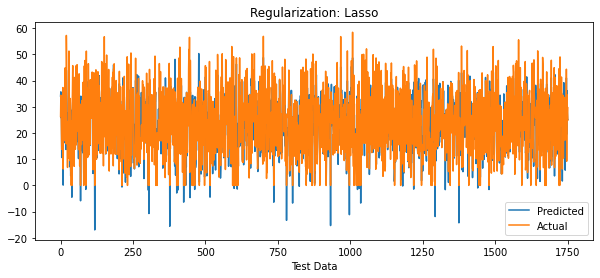

In [94]:
#Plot the figure
plt.figure(figsize=(10,4))
plt.plot(np.array(Y_pred_test_lasso))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.title('Regularization: Lasso')
plt.show()


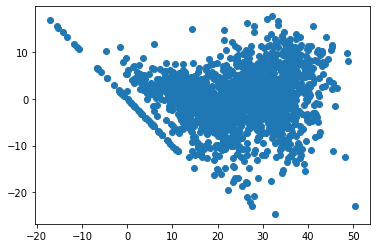

In [95]:
### Heteroscadacity
plt.scatter((Y_pred_test_lasso),(Y_test-Y_pred_test_lasso))

In [96]:
result=pd.concat([lasso_dict3,lasso_dict4],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Lasso regression,4.68,37.71,6.14,0.76,0.76
Test set,1,Lasso regression,4.53,35.05,5.92,0.77,0.79


RIDGE REGRESSION

In [97]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [98]:
#FIT THE MODEL
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [99]:
#check the score
ridge.score(X_train, Y_train)

0.7571256749553796

In [100]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [101]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((Y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(Y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(Y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(Y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.711079832338605
RMSE : 6.140934768611258
MAE : 4.684213699463668
R2 : 0.7571256749553796
Adjusted R2 : 0.7504266765533273


In [102]:
#Score matrics on test data
print(f"Ridge Regression: evaluation metrics on the testing set:")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score      
MSE_ridge2 = (mean_squared_error(Y_test, y_pred_test_ridge))
print('MSE', MSE_ridge2)
MAE_ridge2 =  (mean_absolute_error(Y_train, y_pred_train_ridge))
print('MAE', MAE_ridge2)
RMSE_ridge2 =  np.sqrt(mean_squared_error(Y_test, y_pred_test_ridge))
print("RMSE", RMSE_ridge2)
R2_score_ridge2 = r2_score(Y_test,y_pred_test_ridge)
print("R2_score", R2_score_ridge2)
Adjusted_r2_ridge2 = 1-(1-(R2_score_ridge2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2", Adjusted_r2_ridge2)

Ridge Regression: evaluation metrics on the testing set:
MSE 35.04825619019779
MAE 4.684213699463668
RMSE 5.920156770744994
R2_score 0.7723226752869078
Adjusted_R2 0.7936250025982251


In [103]:
# creating a dict to concat ridge training and test data score metrics
# storing the Train set metrics value in a dict5 for later comparison
dict5={'Model':'Ridge regression ',
       'MAE':round((MAE_r),2),
       'MSE':round((MSE_r),2),
       'RMSE':round((RMSE_r),2),
       'R2_score':round((r2_r),2),
       'Adjusted R2':round((Adjusted_R2_r),2)
       }
ridge_dict5 =pd.DataFrame(dict5,index=[1])
training_df=training_df.append(dict5,ignore_index=True)

# storing the test set metrics value in a dict6 for later comparison
dict6={'Model':'Ridge regression ',
       'MAE':round((MAE_ridge2),2),
       'MSE':round((MSE_ridge2),2),
       'RMSE':round((RMSE_ridge2),2),
       'R2_score':round((R2_score_ridge2),2),
       'Adjusted R2':round((Adjusted_r2_ridge2 ),2)
       }
ridge_dict6 =pd.DataFrame(dict6,index=[1])
test_df=test_df.append(dict6,ignore_index=True)

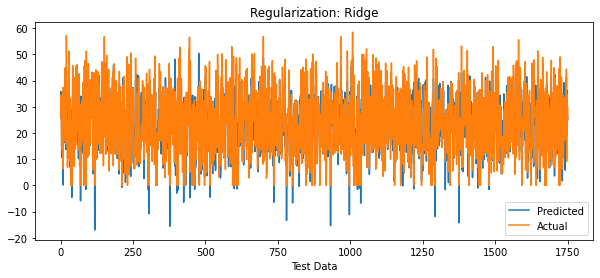

In [104]:
#Plot the figure
plt.figure(figsize=(10,4))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.title('Regularization: Ridge')
plt.show()

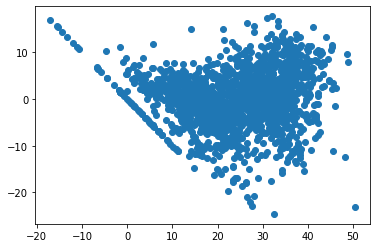

In [105]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(Y_test)-(y_pred_test_ridge))

In [106]:
result=pd.concat([ridge_dict5,ridge_dict6],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Ridge regression,4.68,37.71,6.14,0.76,0.75
Test set,1,Ridge regression,4.68,35.05,5.92,0.77,0.79


# ELASTIC NET REGRESSION

In [107]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [108]:
#FIT THE MODEL
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [109]:
#check the score
elasticnet.score(X_train, Y_train)

0.6148836485268501

In [110]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [111]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((Y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(Y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(Y_train, y_pred_train_en)
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score(Y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.79698954376821
RMSE : 7.7328513204230305
MAE : 5.932846194328887
R2 : 0.6148836485268501
Adjusted R2 : 0.604261307846546


In [112]:
#Score matrics on test data
print(f"Ridge Regression: evaluation metrics on the testing set:")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score      
MSE_e = (mean_squared_error(Y_test, y_pred_test_en))
print('MSE:', MSE_e)

MAE_ridge2 =  (mean_absolute_error(Y_train, y_pred_train_en))
print('MAE', MAE_e)

RMSE_ridge2 =  np.sqrt(mean_squared_error(Y_test, y_pred_test_en))
print("RMSE", RMSE_e)

R2_e = r2_score(Y_test,y_pred_test_en)
print("R2_score", R2_e)

Adjusted_r2_e = 1-(1-(r2_e)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2:", Adjusted_r2_e)

Ridge Regression: evaluation metrics on the testing set:
MSE: 59.0587450411667
MAE 5.932846194328887
RMSE 7.7328513204230305
R2_score 0.6163479004799653
Adjusted_R2: 0.6318434674709592


In [113]:
 #storing the test set metrics value in a dataframe for later comparison
dict7={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}

e_dict7 =pd.DataFrame(dict7,index=[1])
training_df=training_df.append(dict7,ignore_index=True)

 #storing the test set metrics value in a dict6 for later comparison
dict8={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)
       }
e_dict8 =pd.DataFrame(dict8,index=[1])
test_df=test_df.append(dict8,ignore_index=True)

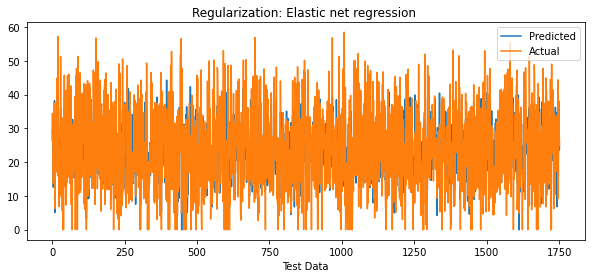

In [114]:
#Plot the figure
plt.figure(figsize=(10,4))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.title('Regularization: Elastic net regression ')
plt.show()

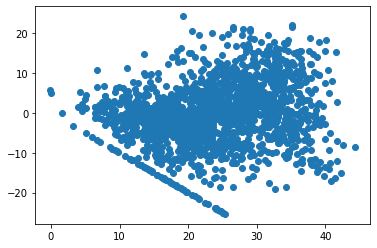

In [115]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(Y_test)-(y_pred_test_en))

In [116]:
result=pd.concat([e_dict7,e_dict8],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Elastic net regression Test,5.933,59.059,7.733,0.615,0.6
Test set,1,Elastic net regression Test,5.933,59.059,7.733,0.615,0.6


## **Decision Tree**

In [117]:
# importing deciion tree regressor
from sklearn.tree import DecisionTreeRegressor

In [118]:
# storing object for decision tree regresssor with max depth 15
dt_model = DecisionTreeRegressor(max_depth = 12)
# calling dt_model to train,fit and evalution of decision tree model
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=12)

In [119]:
#Y_pred for traning and testing dataset
Y_pred1_dt = dt_model.predict(X_train)
Y_pred2_dt = dt_model.predict(X_test)

In [120]:
# decision tree score
dt_model.score(X_train , Y_train )

0.8679259777283864

In [121]:
#Score matrics on train data
print(f"Decision Tree: evaluation metrics on the training set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   
MSE_dt1 = mean_squared_error(Y_train, Y_pred1_dt)
print("MSE", MSE_dt1)
MAE_dt1 = mean_absolute_error(Y_train, Y_pred1_dt)
print('MAE', MAE_dt1)
RMSE_dt1 =  np.sqrt(mean_squared_error(Y_train, Y_pred1_dt))
print("RMSE", RMSE_dt1)
R2_score_dt1 = r2_score(Y_train, Y_pred1_dt)
print("R2_score", R2_score_dt1)
Adjusted_r2_dt1 = 1-(1-(R2_score_dt1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_dt1)
print()

Decision Tree: evaluation metrics on the training set:
MSE 20.507124401675018
MAE 2.9288650558227465
RMSE 4.528479259274024
R2_score 0.8679259777283864
Adjusted_R2 0.873786972118219



In [122]:
#Score matrics on test data
print(f"Decision Tree: evaluation metrics on the testing set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   
MSE_dt2 = mean_squared_error(Y_test, Y_pred2_dt)
print("MSE", MSE_dt2)
MAE_dt2 = mean_absolute_error(Y_test, Y_pred2_dt)
print('MAE', MAE_dt2)
RMSE_dt2 =  np.sqrt(mean_squared_error(Y_test, Y_pred2_dt))
print("RMSE", RMSE_dt2)
R2_score_dt2 = r2_score(Y_test, Y_pred2_dt)
print("R2_score", R2_score_dt2)
Adjusted_r2_dt2 = 1-(1-(R2_score_dt2)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_dt2)

Decision Tree: evaluation metrics on the testing set:
MSE 30.883354008429436
MAE 3.8941066223762175
RMSE 5.557279371097825
R2_score 0.7993783376653958
Adjusted_R2 0.804776438508826


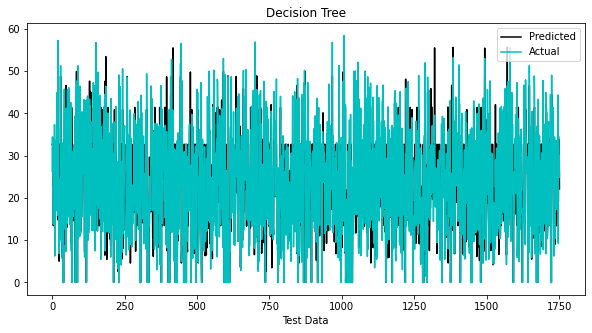

In [123]:
plt.figure(figsize=(10,5))
plt.plot((Y_pred2_dt), color = 'k')
plt.plot(np.array(Y_test), color = 'c')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.title('Decision Tree')
plt.show()

In [124]:
# creating a dict to concat ridge training and test data score metrics
# storing the Train set metrics value in a dict7 for later comparison
dict7={'Model':'Decision Tree ',
       'MAE':round((MAE_dt1),2),
       'MSE':round((MSE_dt1),2),
       'RMSE':round((RMSE_dt1),2),
       'R2_score':round((R2_score_dt1),2),
       'Adjusted R2':round((Adjusted_r2_dt1),2)
       }
dt_dict7 =pd.DataFrame(dict7,index=[1])
training_df=training_df.append(dict7,ignore_index=True)

# storing the test set metrics value in a dict8 for later comparison
dict8={'Model':'Decision Tree',
       'MAE':round((MAE_dt2),2),
       'MSE':round((MSE_dt2),2),
       'RMSE':round((RMSE_ridge2),2),
       'R2_score':round((R2_score_ridge2),2),
       'Adjusted R2':round((Adjusted_r2_ridge2 ),2)
       }
dt_dict8 =pd.DataFrame(dict8,index=[1])
test_df=test_df.append(dict8,ignore_index=True)

In [125]:
result=pd.concat([dt_dict7,dt_dict8],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Decision Tree,2.93,20.51,4.53,0.87,0.87
Test set,1,Decision Tree,3.89,30.88,7.68,0.77,0.79


# **Random Forest**

In [126]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [127]:
# creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[60,80]
max_features = [0.2, 0.5, 0.8 ]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes, "max_features" : max_features }

In [128]:
# creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf,param_grid=params,verbose=0, n_jobs = -1)

In [129]:
rf_grid.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'max_features': [0.2, 0.5, 0.8],
                         'max_leaf_nodes': [60, 80],
                         'n_estimators': [60, 80, 100]})

In [130]:
# to see best prameter
rf_grid.best_params_

{'max_depth': 20,
 'max_features': 0.8,
 'max_leaf_nodes': 80,
 'n_estimators': 100}

In [131]:
rf_grid.best_score_

0.8695257484784757

In [132]:
# random forest with best parameter
rf = RandomForestRegressor(max_depth = 20, max_leaf_nodes = 80, n_estimators =  80)

In [133]:
# fitting x-train and y-train
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, max_leaf_nodes=80, n_estimators=80)

In [134]:
# predictions and score
rf_y_pred1 = rf.predict(X_train)
rf_y_pred2 = rf.predict(X_test)
rf.score(X_train, Y_train)

0.8903405138362911

In [135]:
#Score matrics on train data
print(f"Random Forest: evaluation metrics on the training set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE_rf1 = mean_squared_error(Y_train, rf_y_pred1)       
print("MSE", MSE_rf1)
MAE_rf1 = mean_absolute_error(Y_train, rf_y_pred1)
print('MAE', MAE_rf1)
RSME_rf1 = np.sqrt(mean_squared_error(Y_train, rf_y_pred1))
print("RMSE", RSME_rf1)
R2_score_rf1 = r2_score(Y_train, rf_y_pred1)
print("R2score", R2_score_rf1)
Adjusted_r2_rf1 = 1-(1-(R2_score_rf1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_rf1)
print()


#Score matrics on train data
print(f"Random Forest: evaluation metrics on the testing set:")
MSE_rf2 = mean_squared_error(Y_test, rf_y_pred2)       
print("MSE", MSE_rf2)
MAE_rf2 = mean_absolute_error(Y_test, rf_y_pred2)
print('MAE', MAE_rf2)
RSME_rf2 = np.sqrt(mean_squared_error(Y_test, rf_y_pred2))
print("RMSE", RSME_rf2)
R2_score_rf2 = r2_score(Y_test, rf_y_pred2)
print("R2score", R2_score_rf2)
Adjusted_r2_rf2 = 1-(1-(R2_score_rf2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2", Adjusted_r2_rf2)


Random Forest: evaluation metrics on the training set:
MSE 17.026820913791994
MAE 3.0367596005189235
RMSE 4.126356857300638
R2score 0.8903405138362911
Adjusted_R2 0.8963528707544385

Random Forest: evaluation metrics on the testing set:
MSE 20.79669787355623
MAE 3.226518671641543
RMSE 4.560339666467425
R2score 0.8649023646419821
Adjusted_R2 0.8887582397230697


In [136]:
# creating a dict to concat ridge training and test data score metrics
# storing the Train set metrics value in a dict9 for later comparison
dict9={'Model':'Random Forest ',
       'MAE':round((MAE_rf1),2),
       'MSE':round((MSE_rf1),2),
       'RMSE':round((RSME_rf1),2),
       'R2_score':round((R2_score_rf1),2),
       'Adjusted R2':round((Adjusted_r2_rf1),2)
       }
training_df=training_df.append(dict9,ignore_index=True)
rf_dict9 =pd.DataFrame(dict9,index=[1])

# storing the test set metrics value in a dict10 for later comparison
dict10={'Model':'Random Forest ',
       'MAE':round((MAE_rf2),2),
       'MSE':round((MSE_rf2),2),
       'RMSE':round((RSME_rf2),2),
       'R2_score':round((R2_score_rf2),2),
       'Adjusted R2':round((Adjusted_r2_rf2 ),2)
       }
test_df=test_df.append(dict10,ignore_index=True)
rf_dict10 =pd.DataFrame(dict10,index=[1])

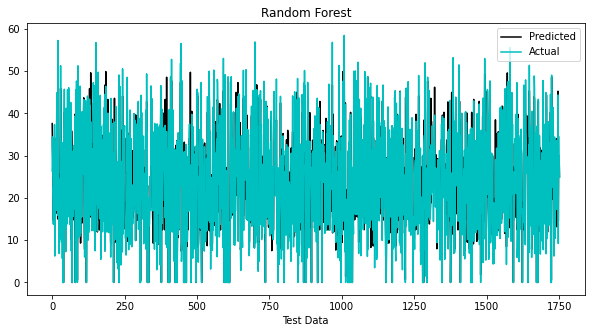

In [137]:
plt.figure(figsize=(10,5))
plt.plot((rf_y_pred2), color = 'k')
plt.plot(np.array(Y_test), color = 'c')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.title('Random Forest')
plt.show()

In [138]:
result=pd.concat([rf_dict9,rf_dict10],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Random Forest,3.04,17.03,4.13,0.89,0.90
Test set,1,Random Forest,3.23,20.80,4.56,0.86,0.89


In [139]:
rf.feature_importances_

array([3.16912559e-01, 1.72621505e-01, 9.12938604e-04, 1.86984871e-03,
       2.19589715e-02, 3.37472383e-02, 9.99717263e-05, 4.01575486e-03,
       1.50291807e-02, 2.52741971e-02, 3.39540916e-02, 3.15214393e-02,
       9.67445732e-03, 1.31915231e-03, 1.40109806e-02, 7.12538240e-05,
       1.62958521e-03, 1.16218992e-04, 1.57102929e-04, 0.00000000e+00,
       0.00000000e+00, 4.84412552e-04, 3.54427434e-03, 1.01861216e-02,
       3.69677610e-02, 1.78078383e-02, 1.10336524e-02, 1.08784418e-02,
       7.18871715e-03, 1.91770546e-03, 5.72614178e-03, 5.23096004e-04,
       2.03663781e-02, 3.58354544e-04, 1.82024231e-01, 1.77936836e-04,
       0.00000000e+00, 6.36708411e-05, 4.04179729e-05, 8.65597012e-05,
       9.38560927e-05, 2.44068573e-04, 2.08981461e-04, 1.08553852e-03,
       2.83946140e-04, 1.57319211e-04, 3.65413100e-03])

In [140]:
importances = rf.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [141]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [142]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.18
1,Humidity,0.17
24,Hour_18,0.04
5,Rainfall,0.03
9,Hour_3,0.03
10,Hour_4,0.03
11,Hour_5,0.03
32,Seasons_Winter,0.02
4,Solar_Radiation,0.02


In [143]:
#FIT THE MODEL
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, max_leaf_nodes=80, n_estimators=80)

In [144]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

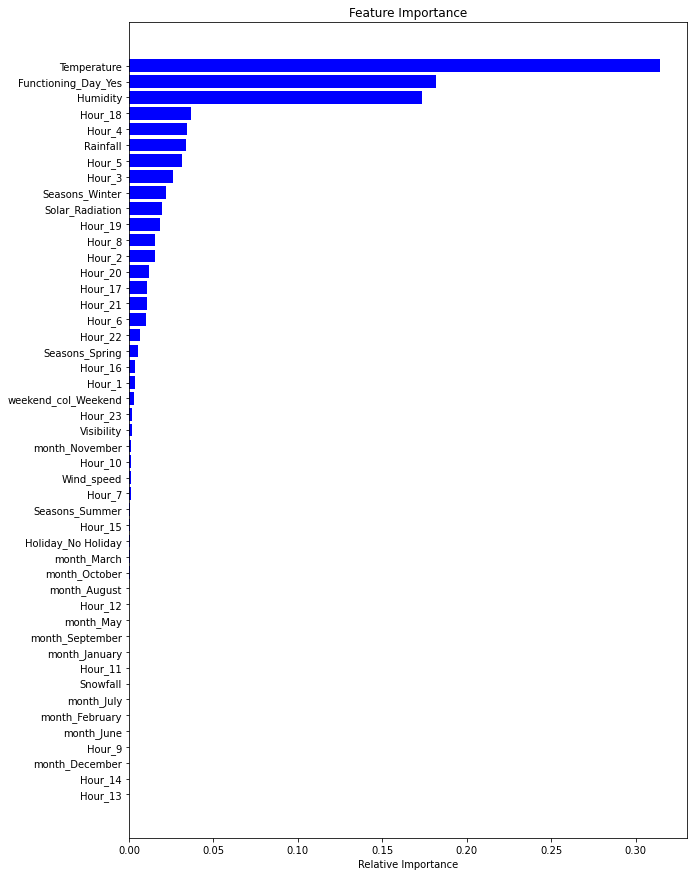

In [145]:
#Plot the figure
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# GRADIENT BOOSTING

In [146]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb =GradientBoostingRegressor()


In [147]:
# creating param dict to check diffirent value of parameter
n_estimators=[100,150, 180]
max_depth=[5, 8, 10, 12]

params = {'n_estimators':n_estimators,'max_depth':max_depth}

In [148]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb,param_grid=params,verbose=0)

In [149]:
# fitting x-train and y-train
gb_grid.fit(X_train, Y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 8, 10, 12],
                         'n_estimators': [100, 150, 180]})

In [150]:
gb_grid.best_params_

{'max_depth': 8, 'n_estimators': 150}

In [151]:
gb_grid.best_score_

0.9096102420380576

In [152]:
#creating model of Gradient Boosting
gb =GradientBoostingRegressor(max_depth = 8, n_estimators = 180)
gb.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=8, n_estimators=180)

In [153]:
# predictions and score
gb_y_pred1 = gb.predict(X_train)
gb_y_pred2 = gb.predict(X_test)
gb.score(X_train, Y_train)

0.9896997914557173

In [154]:
#Score matrics on train data
print(f"Gradient Boosting: evaluation metrics on the training set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE_gb1 = mean_squared_error(Y_train, gb_y_pred1)       
print("MSE", MSE_gb1)
MAE_gb1 = mean_absolute_error(Y_train, gb_y_pred1)
print('MAE', MAE_gb1)
RSME_gb1 = np.sqrt(mean_squared_error(Y_train, gb_y_pred1))
print("RMSE", RSME_gb1)
R2_score_gb1 = r2_score(Y_train, gb_y_pred1)
print("R2score", R2_score_gb1)
Adjusted_r2_gb1 = 1-(1-(R2_score_gb1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_gb1)
print()


#Score matrics on train data
print(f"Gradient Boosting: evaluation metrics on the testing set:")
MSE_gb2 = mean_squared_error(Y_test, gb_y_pred2)       
print("MSE", MSE_gb2)
MAE_gb2 = mean_absolute_error(Y_test, gb_y_pred2)
print('MAE', MAE_gb2)
RSME_gb2 = np.sqrt(mean_squared_error(Y_test, gb_y_pred2))
print("RMSE", RSME_gb2)
R2_score_gb2 = r2_score(Y_test, gb_y_pred2)
print("R2score", R2_score_gb2)
Adjusted_r2_gb2 = 1-(1-(R2_score_gb2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2", Adjusted_r2_gb2)

Gradient Boosting: evaluation metrics on the training set:
MSE 1.5993126759356646
MAE 0.8877626899564272
RMSE 1.2646393461915
R2score 0.9896997914557173
Adjusted_R2 0.9963831090129615

Gradient Boosting: evaluation metrics on the testing set:
MSE 13.129542873915566
MAE 2.3569390855214687
RMSE 3.623471108469828
R2score 0.9147090462927231
Adjusted_R2 0.9399386972174637


In [155]:
# creating a dict to concat ridge training and test data score metrics
# storing the Train set metrics value in a dict11 for later comparison
dict11={'Model':'Gradient Boosting',
       'MAE':round((MAE_gb1),2),
       'MSE':round((MSE_gb1),2),
       'RMSE':round((RSME_gb1),2),
       'R2_score':round((R2_score_gb1),2),
       'Adjusted R2':round((Adjusted_r2_gb1),2)
       }
training_df=training_df.append(dict11,ignore_index=True)
gb_dict11 =pd.DataFrame(dict11,index=[1])

# storing the test set metrics value in a dict12 for later comparison
dict12={'Model':'Gradient Boosting',
       'MAE':round((MAE_gb2),2),
       'MSE':round((MSE_gb2),2),
       'RMSE':round((RSME_gb2),2),
       'R2_score':round((R2_score_gb2),2),
       'Adjusted R2':round((Adjusted_r2_gb2 ),2)
       }
test_df=test_df.append(dict12,ignore_index=True)
gb_dict12 =pd.DataFrame(dict12,index=[1])

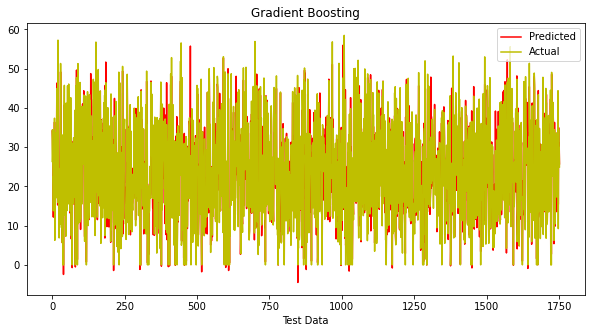

In [156]:
plt.figure(figsize=(10,5))
plt.plot((gb_y_pred2), color = 'r')
plt.plot(np.array(Y_test), color = 'y')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.title('Gradient Boosting')
plt.show()

In [157]:
result=pd.concat([gb_dict11,gb_dict12],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Gradient Boosting,0.89,1.60,1.26,0.99,1.00
Test set,1,Gradient Boosting,2.36,13.13,3.62,0.91,0.94


In [158]:
gb.feature_importances_

array([0.30065743, 0.157858  , 0.0092348 , 0.01141238, 0.03320052,
       0.04477874, 0.0009768 , 0.0015547 , 0.00862321, 0.02071393,
       0.02789153, 0.02522405, 0.0067451 , 0.00440236, 0.0154548 ,
       0.00091683, 0.00352751, 0.00171064, 0.00037229, 0.00040879,
       0.00052395, 0.00088992, 0.00194353, 0.00923663, 0.03223497,
       0.0175083 , 0.01433642, 0.01479473, 0.01058245, 0.0032814 ,
       0.00794439, 0.00213993, 0.02152239, 0.00312514, 0.15760484,
       0.001431  , 0.00054497, 0.00070886, 0.00124378, 0.0010767 ,
       0.00114031, 0.00200569, 0.00119302, 0.00263111, 0.00203024,
       0.00209134, 0.01056957])

In [159]:
importances = gb.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [160]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [161]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.30
1,Humidity,0.16
2,Wind_speed,0.01
3,Visibility,0.01
4,Solar_Radiation,0.03


In [162]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.30
1,Humidity,0.16
34,Functioning_Day_Yes,0.16
5,Rainfall,0.04
4,Solar_Radiation,0.03
10,Hour_4,0.03
11,Hour_5,0.03
24,Hour_18,0.03
32,Seasons_Winter,0.02
9,Hour_3,0.02


In [163]:
gb.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=8, n_estimators=180)

In [164]:
features = X_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

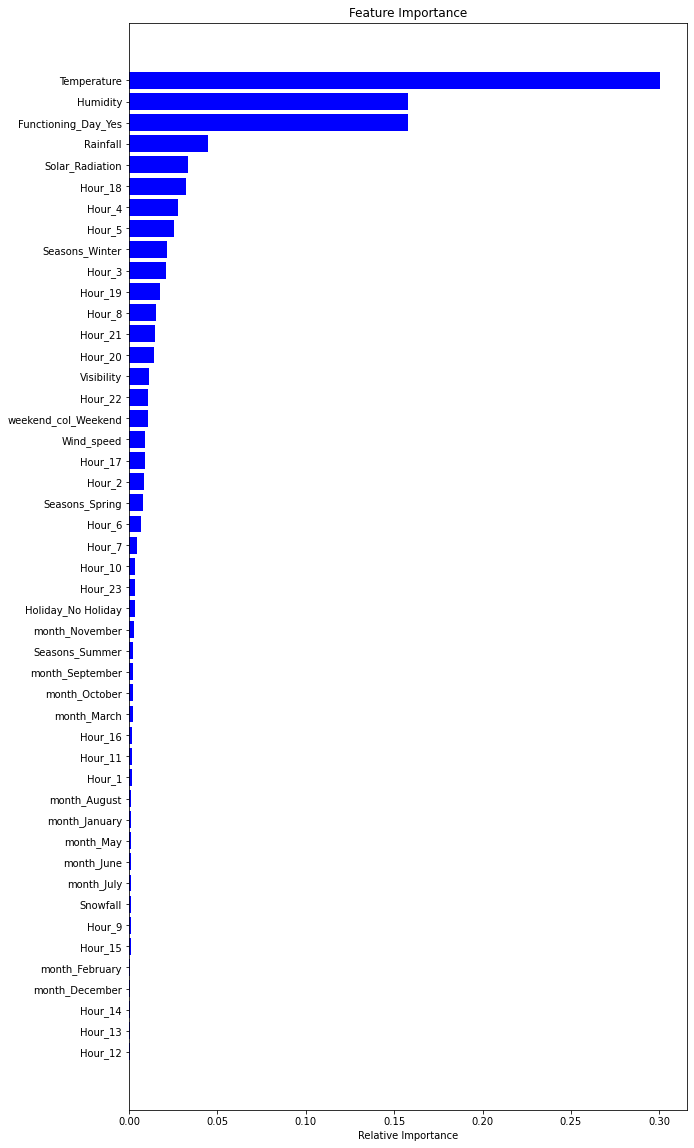

In [165]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [166]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [167]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [168]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [169]:
gb_optimal_model = gb_grid.best_estimator_

In [170]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [171]:
# Making predictions on train and test data
y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [172]:
from sklearn.metrics import mean_squared_error

print("Model Score:",gb_optimal_model.score(X_train,Y_train))
print(f"Grid search CV: evaluation metrics on the traning set:")
MSE_gbh= mean_squared_error(Y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(Y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(Y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(Y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

from sklearn.metrics import mean_squared_error
print(f"Grid search CV: evaluation metrics on the testing set:")
MSE_gbh= mean_squared_error(Y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(Y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((Y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(Y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9382107840271467
Grid search CV: evaluation metrics on the traning set:
MSE : 9.594007336517741
RMSE : 3.097419464089057
MAE : 2.163971112199341
R2 : 0.9382107840271467
Adjusted R2 : 0.9365065040091162
Grid search CV: evaluation metrics on the testing set:
MSE : 13.921193565035036
RMSE : 3.7311115723112644
MAE : 2.5341259814663197
R2 : 0.9095663963850292
Adjusted R2 : 0.9070720422947102


In [188]:
# storing the test set metrics value in a dataframe for later comparison
dict13={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict13,ignore_index=True)
cv_dict13 =pd.DataFrame(dict13,index=[1])



# storing the test set metrics value in a dataframe for later comparison
dict14={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict14,ignore_index=True)
cv_dict14 =pd.DataFrame(dict14,index=[1])


In [189]:
result=pd.concat([cv_dict13,cv_dict14],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Gradient Boosting gridsearchcv,2.534,13.921,3.731,0.91,0.91
Test set,1,Gradient Boosting gridsearchcv,2.534,13.921,3.731,0.91,0.91


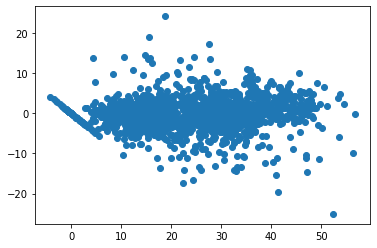

In [190]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(Y_test)-(y_pred_g_g))

In [191]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [192]:
gb_optimal_model.feature_importances_

array([3.07496998e-01, 1.57650261e-01, 5.93762599e-03, 5.92794310e-03,
       3.19473617e-02, 4.69595968e-02, 8.51673728e-04, 1.24024482e-03,
       1.00876174e-02, 2.13160718e-02, 2.91466141e-02, 2.66011184e-02,
       7.54340756e-03, 2.60102201e-03, 1.46592652e-02, 6.78902607e-04,
       3.83089359e-03, 1.89990561e-03, 1.45893612e-04, 1.01398512e-04,
       1.23067092e-04, 3.01882200e-04, 1.66602045e-03, 9.87750610e-03,
       3.34954645e-02, 1.78511295e-02, 1.39120707e-02, 1.29054745e-02,
       1.22103992e-02, 2.93272081e-03, 5.62366830e-03, 7.65091457e-04,
       2.54755480e-02, 2.00073869e-03, 1.65473945e-01, 6.06204295e-04,
       3.04120069e-04, 2.62014110e-04, 4.09820211e-04, 2.29360858e-04,
       1.32468457e-03, 6.95537201e-04, 7.88268294e-04, 2.24716849e-03,
       1.95212990e-03, 9.14952014e-04, 9.02719829e-03])

In [193]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [194]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
2,Wind_speed,0.01
3,Visibility,0.01
4,Solar_Radiation,0.03


In [180]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
34,Functioning_Day_Yes,0.17
1,Humidity,0.16
5,Rainfall,0.05
32,Seasons_Winter,0.03
4,Solar_Radiation,0.03
10,Hour_4,0.03
11,Hour_5,0.03
24,Hour_18,0.03
9,Hour_3,0.02


In [181]:
gb_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [182]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

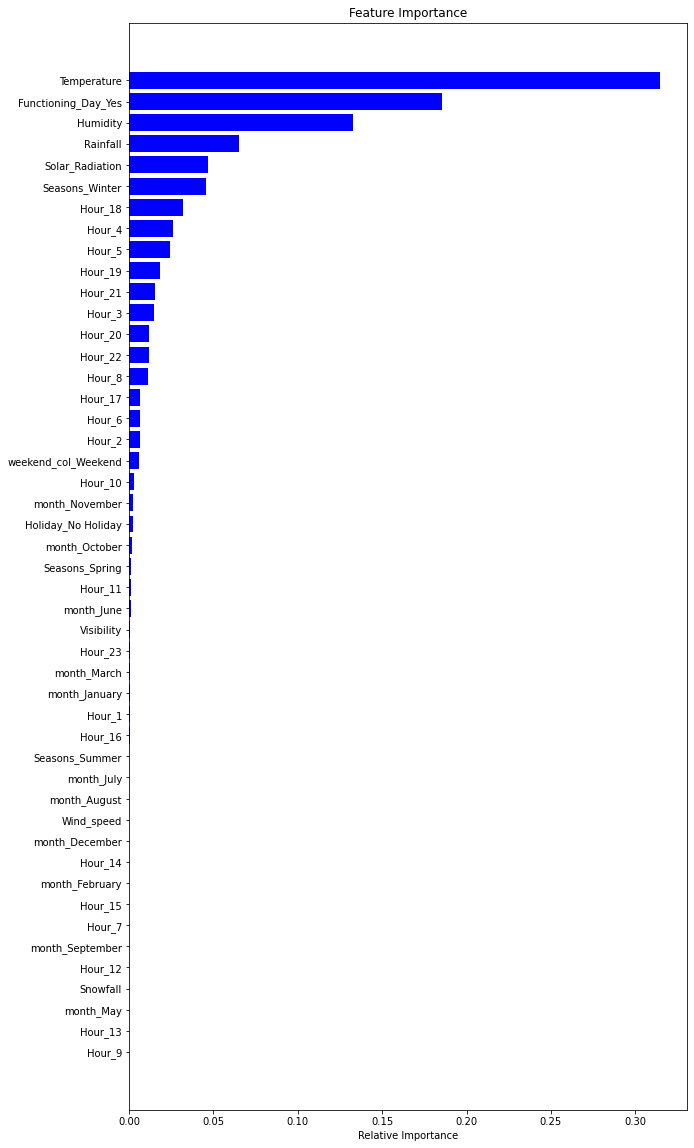

In [183]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Evaluation Matrix

In [187]:
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.680  37.710  6.140   
             1                Lasso regression   4.680  37.710  6.140   
             2                Ridge regression   4.680  37.710  6.140   
             3      Elastic net regression Test  5.933  59.059  7.733   
             4                   Decision Tree   2.930  20.510  4.530   
             5                   Random Forest   3.040  17.030  4.130   
             6                Gradient Boosting  0.890   1.600  1.260   
             7               Linear regression   4.680  37.710  6.140   
             8  Gradient Boosting gridsearchcv   2.534  13.921  3.731   
Test set     0               Linear regression   4.530  35.050  5.920   
             1                Lasso regression   4.530  35.050  5.920   
             2                Ridge regression   4.680  35.050  5.920   
             3      Elastic net regression Test  5.933  59.059  7.733   
             4                    Decision Tree  3.890  30.880  7.680   
             5                   Random Forest   3.230  20.800  4.560   
             6                Gradient Boosting  2.360  13.130  3.620   
             7               Linear regression   4.530  35.050  5.920   
             8  Gradient Boosting gridsearchcv   2.534  13.921  3.731   

                R2_score  Adjusted R2  
Training set 0     0.760         0.75  
             1     0.760         0.76  
             2     0.760         0.75  
             3     0.615         0.60  
             4     0.870         0.87  
             5     0.890         0.90  
             6     0.990         1.00  
             7     0.760         0.75  
             8     0.910         0.91  
Test set     0     0.770         0.77  
             1     0.770         0.79  
             2     0.770         0.79  
             3     0.615         0.60  
             4     0.770         0.79  
             5     0.860         0.89  
             6     0.910         0.94  
             7     0.770         0.77  
             8     0.910         0.91

# **Observation**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. 

There's a high correlation between the dependent variables specifically temperature.

Temperature, Wind Speed, Solar Radiation, Visibility are positively correlated with the target variable.

In general people used rented bikes during their commuting hours i.e. from 7am to 9am in morning and 5pm to 7pm in the evening.

Weekdays are the ones where the demand of the bikes is comparatively high as compared with the weekends.

Summer season was the most preferred season throughout the year where the count was very high. 


After performing the various models. Random Forest and Gradient boosting found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for both models!


# Final Conclusion

We can use either Random Forest or Gradient boosting model for the bike rental stations. Since both the Regressor with Grid Search CV gave us the best results. Therefore, we can deploy it for our predictions. Also, As this data is time dependent, the values for 
variables will not always be consistent. Therefore, we need constantly keep checking for the models.